In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load csv file into a dataframe
choco_df = pd.read_csv("flavors_of_cacao.csv", encoding = 'utf-8')
choco_df.head()

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [3]:
# convert cocoa percent from string to integer

choco_df["Cocoa\nPercent"] = [i[0:2] for i in choco_df["Cocoa\nPercent"]]
choco_df["Cocoa\nPercent"] = choco_df["Cocoa\nPercent"].astype(int)

In [17]:
# View updated table

choco_df.head()

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70,France,3.50,,Peru


/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Density')

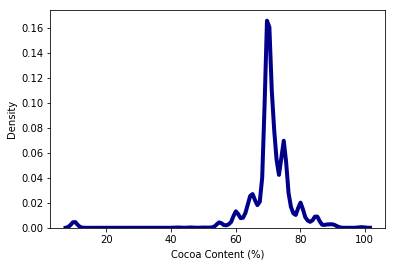

In [5]:
# density distributions for %cocoa
sns.distplot(choco_df["Cocoa\nPercent"], kde = True,
            bins = [100/5], color = "darkblue",
            kde_kws = {"linewidth": 4})
plt.xlabel("Cocoa Content (%)")
plt.ylabel("Density")

/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Density')

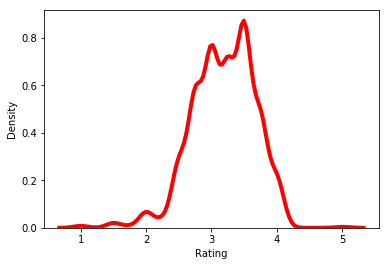

In [6]:
# density distributions for ratings
sns.distplot(choco_df["Rating"], kde = True,
            bins = [5/1], color = "red",
            kde_kws = {"linewidth": 4})
plt.xlabel("Rating")
plt.ylabel("Density")

Text(0,0.5,'Rating')

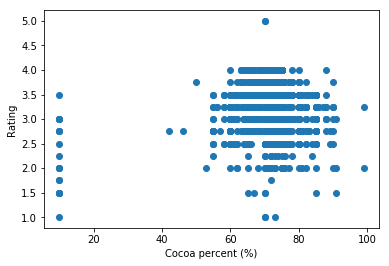

In [7]:
# Relationship between cocoa content and rating
plt.scatter(choco_df["Cocoa\nPercent"], choco_df["Rating"])
plt.xlabel("Cocoa percent (%)")
plt.ylabel("Rating")

In [8]:
# Which country has the best (highest rated) cocoa?
choco_df1 = choco_df.groupby("Company\nLocation")["Rating"].mean()
choco_df1.head()

Company\nLocation
Amsterdam    3.500000
Argentina    3.305556
Australia    3.357143
Austria      3.240385
Belgium      3.093750
Name: Rating, dtype: float64

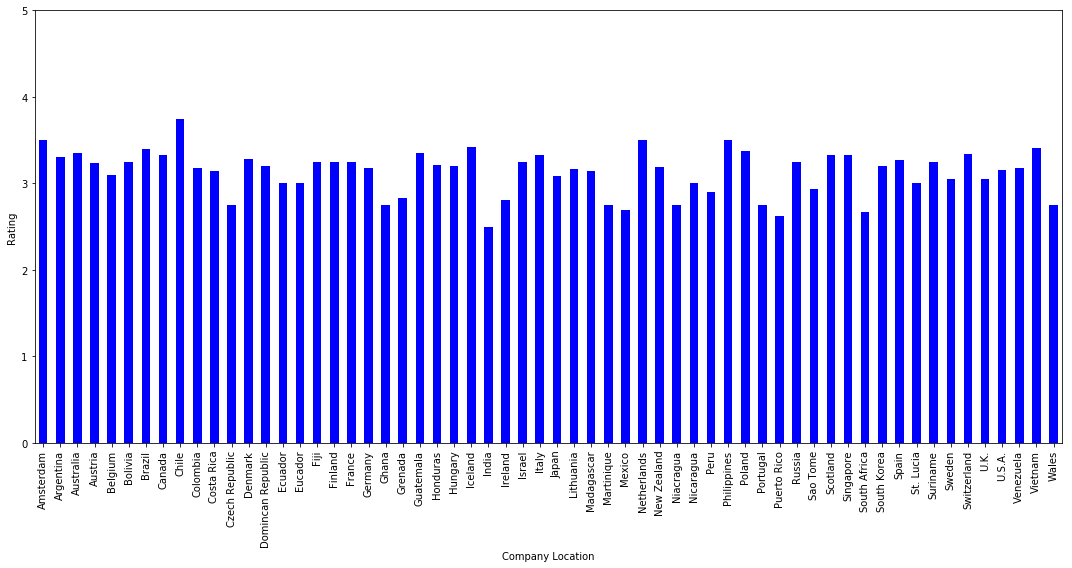

In [9]:
choco_df1.plot.bar(figsize = (15,8), color = "blue")
plt.xlabel("Company Location")
plt.ylabel("Rating")
plt.ylim(0,5)
plt.tight_layout()

In [10]:
# Create a list of years
year_ls = list(choco_df["Review\nDate"].unique())

In [11]:
# Create list of company locations
comp_ls = list(choco_df["Company\nLocation"].unique())

60

In [12]:
# Loop through the years and organise dataset by year
dfs = [choco_df[choco_df["Review\nDate"] == yr] for yr in year_ls]
dfs[0].head()

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63,France,3.75,,Sao Tome
44,Altus aka Cao Artisan,Momotombo,1728,2016,60,U.S.A.,2.75,,Nicaragua
45,Altus aka Cao Artisan,Acopagro,1728,2016,60,U.S.A.,3.00,,Peru
46,Altus aka Cao Artisan,CIAAB Coop,1732,2016,60,U.S.A.,2.50,,Bolivia
47,Altus aka Cao Artisan,Villa Andina,1732,2016,60,U.S.A.,2.50,,Peru


In [14]:
# Loop through the company locations and organise dataset by location
dfx = [choco_df[choco_df["Company\nLocation"] == loc] for loc in comp_ls]
dfx[0].head()

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70,France,3.50,,Peru


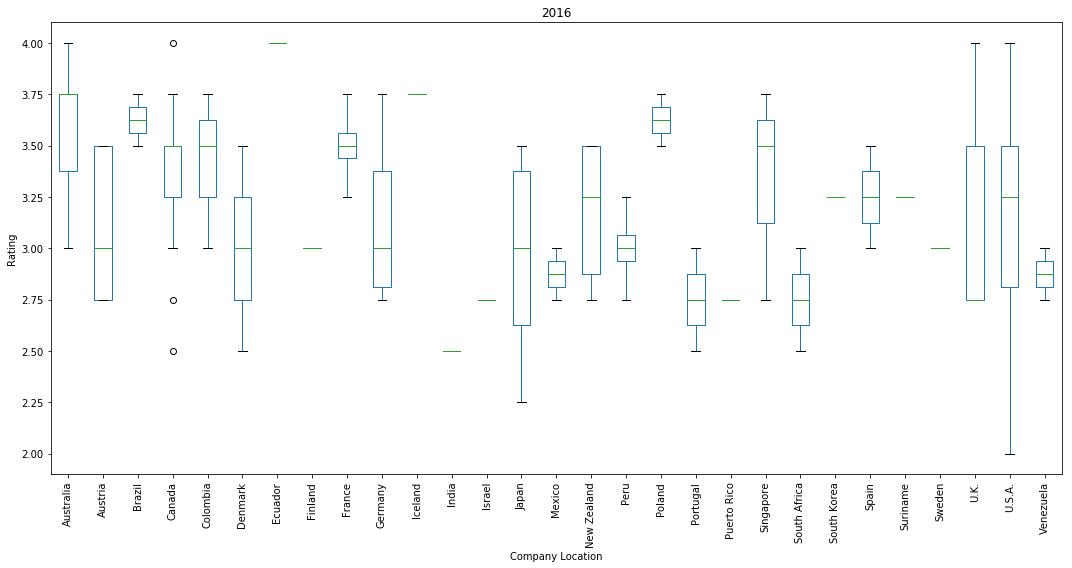

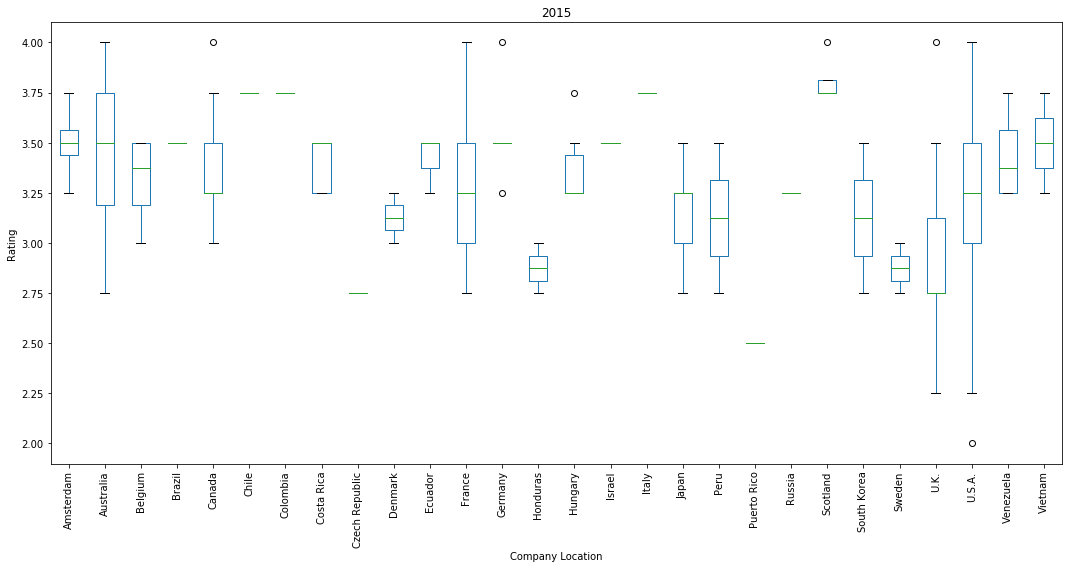

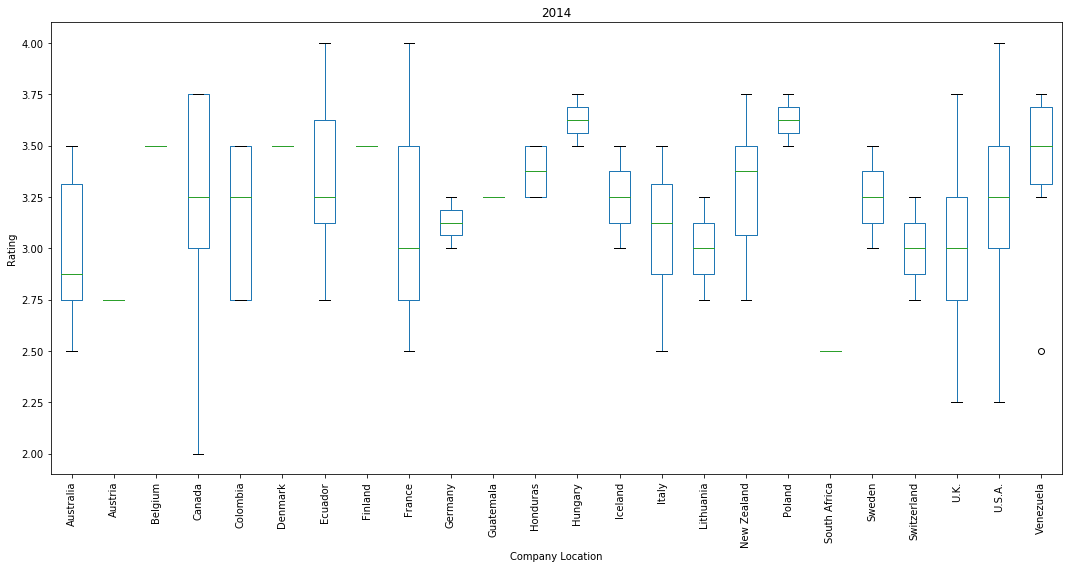

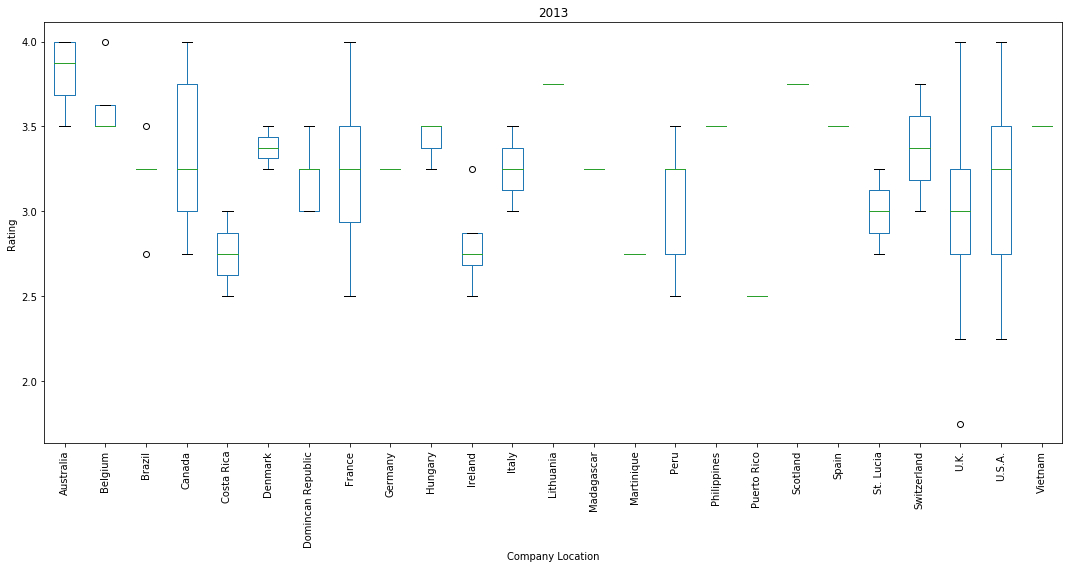

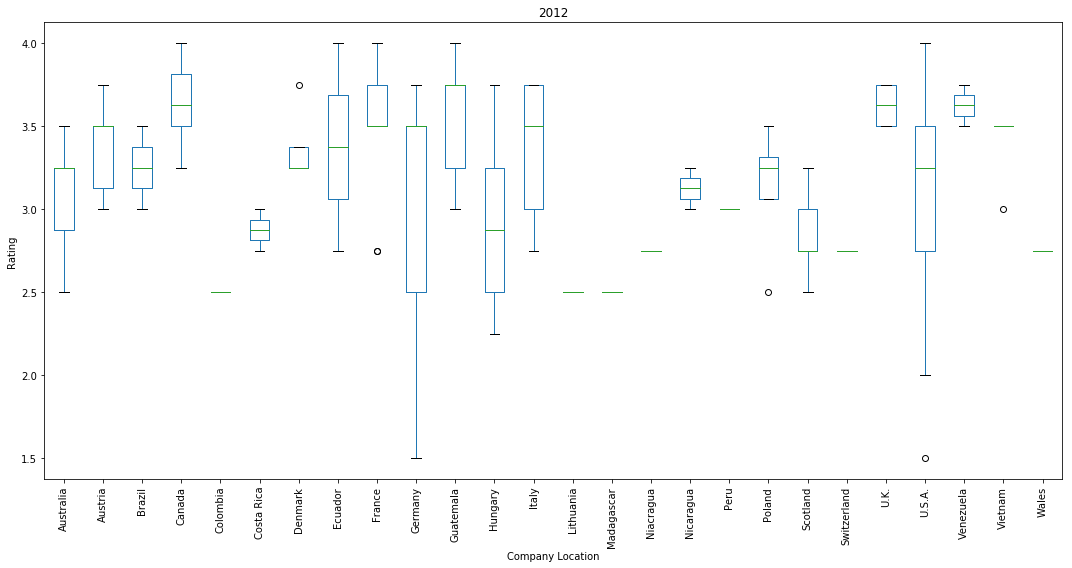

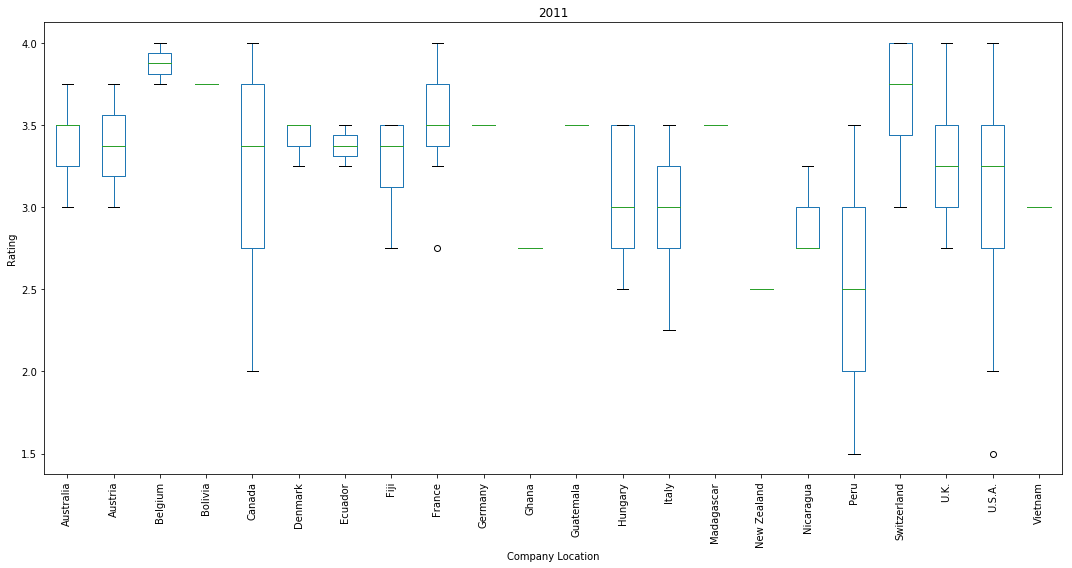

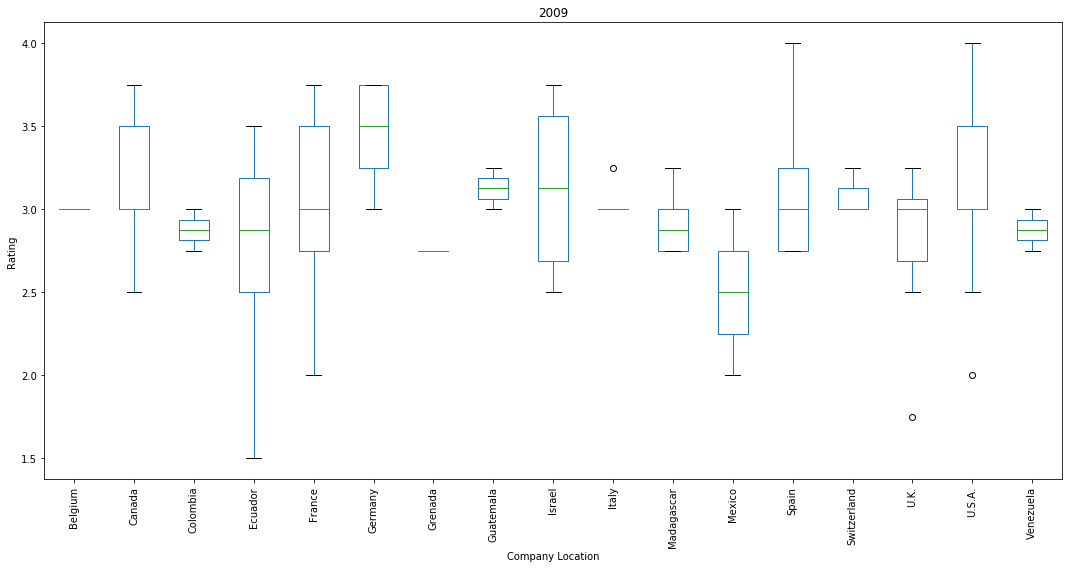

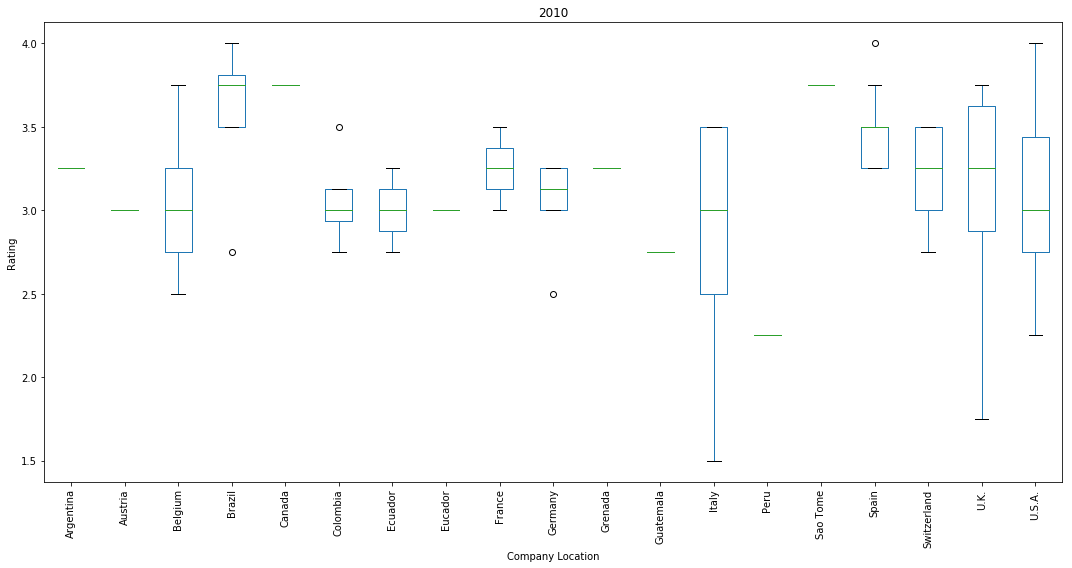

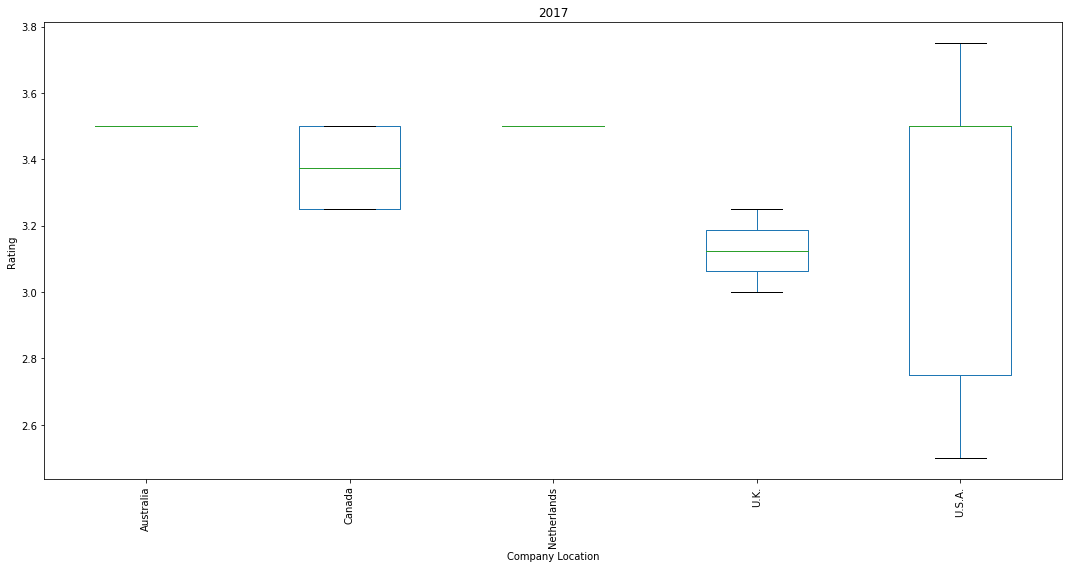

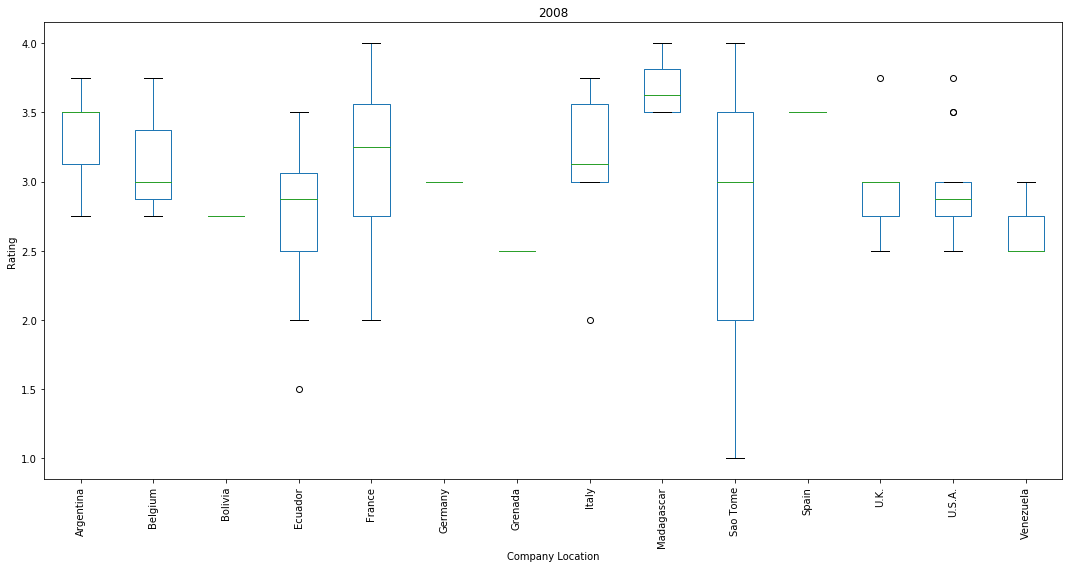

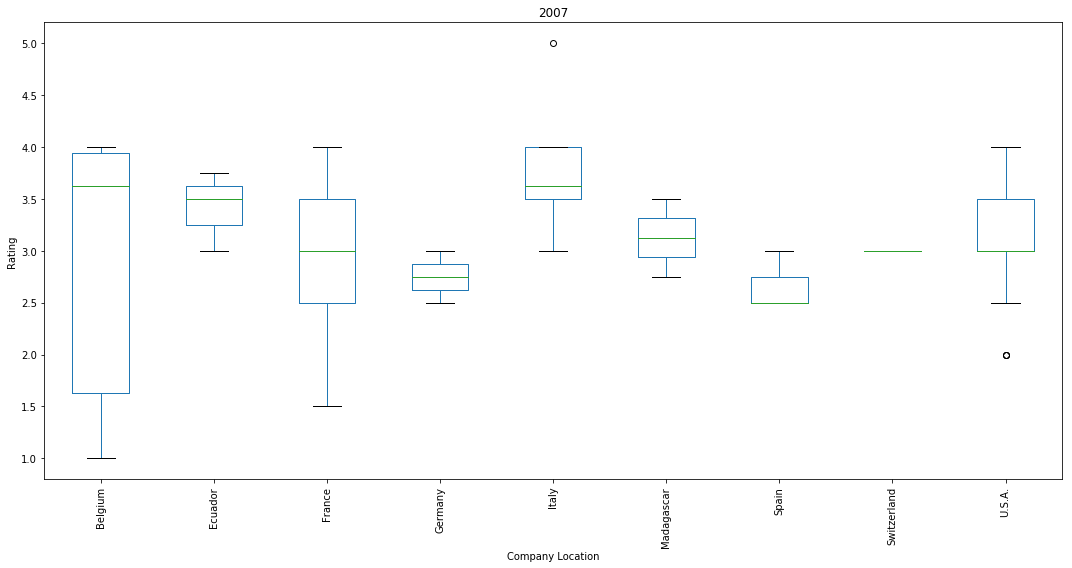

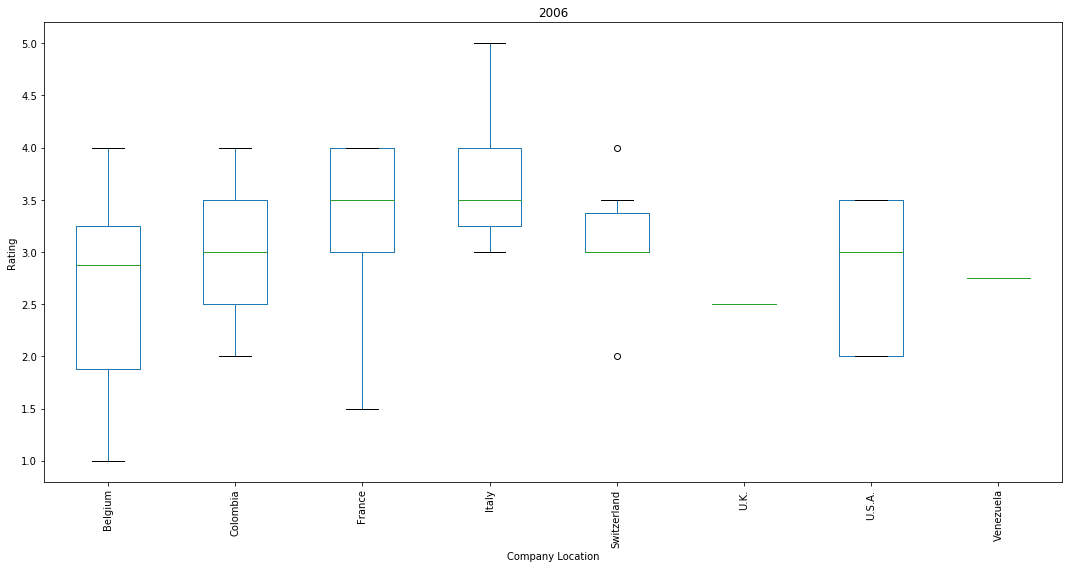

In [13]:
# Plot of rating per country by year

for i in range(len(dfs)):
    dfs[i].boxplot(by = "Company\nLocation",
                   column = "Rating",
                   grid = False, rot = 90, figsize = (15,8))

    plt.suptitle("")
    plt.title(year_ls[i])
    plt.xlabel("Company Location")
    plt.ylabel("Rating")
    plt.tight_layout()

/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


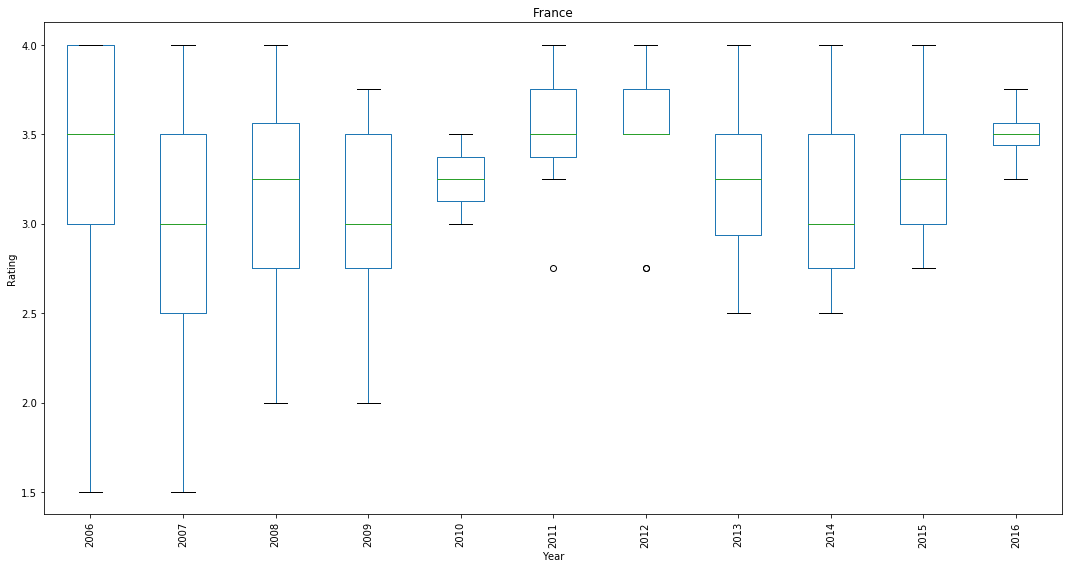

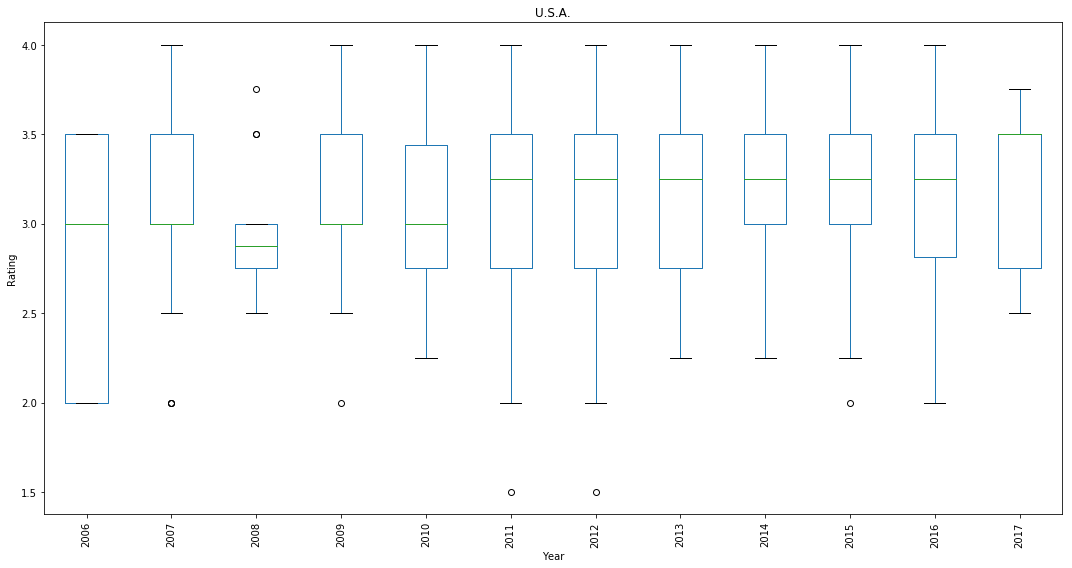

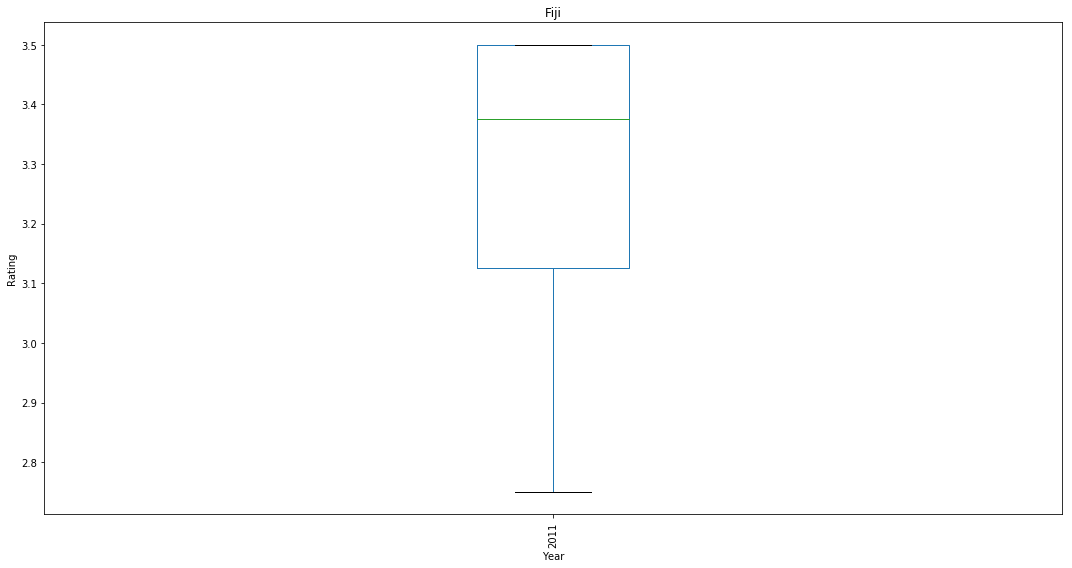

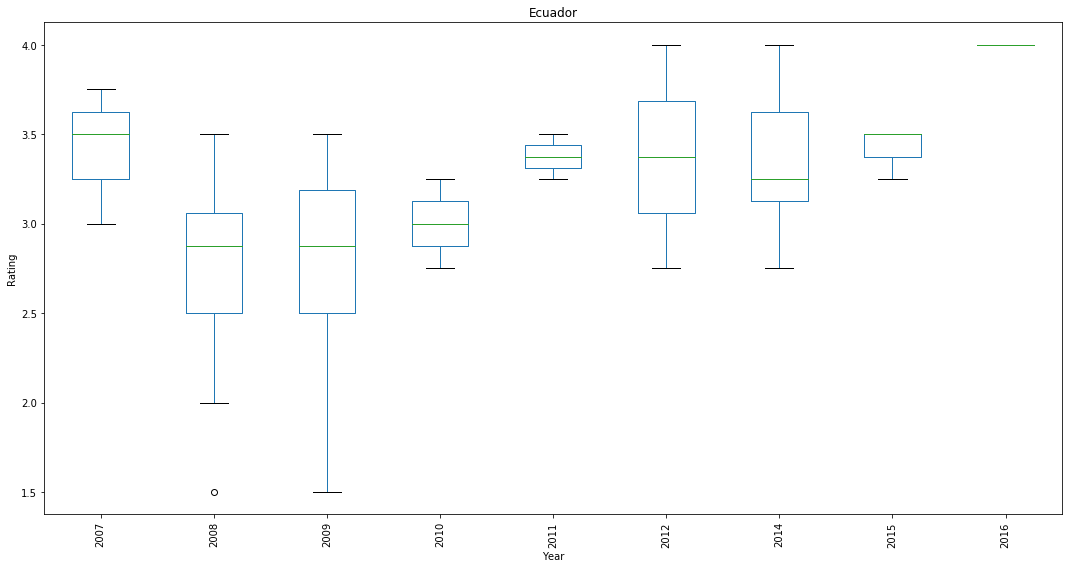

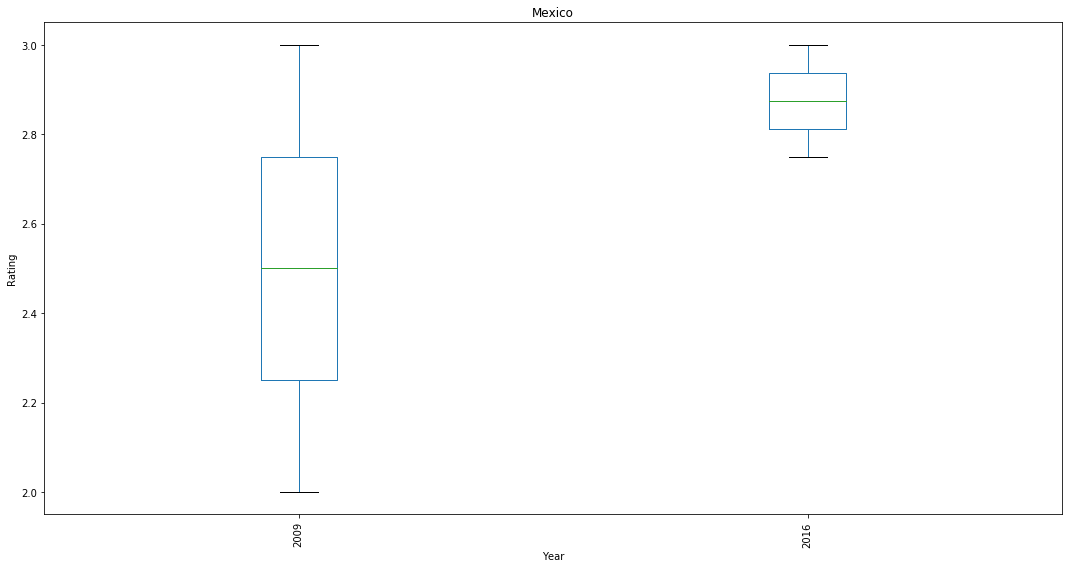

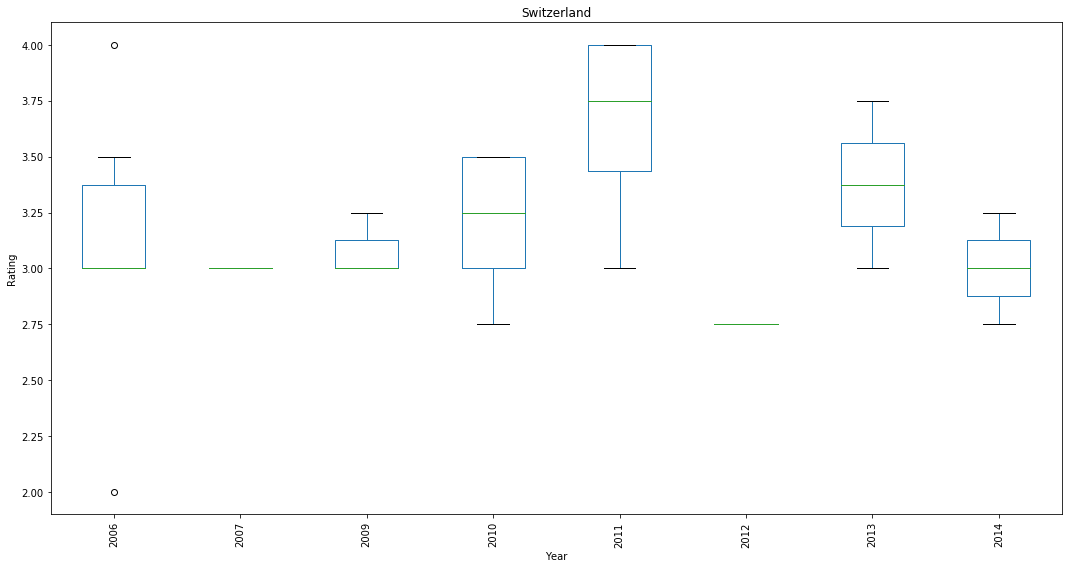

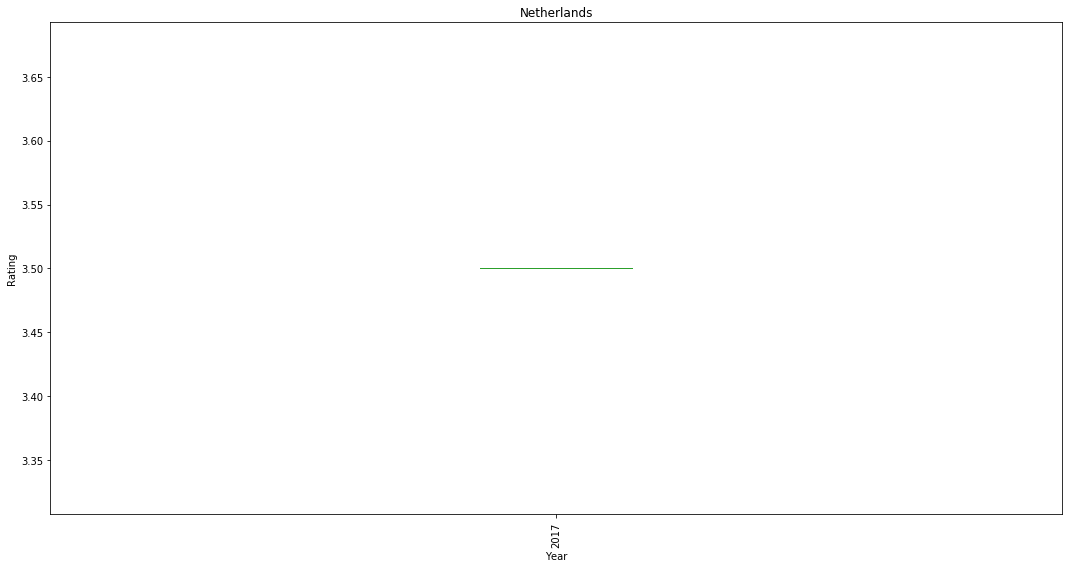

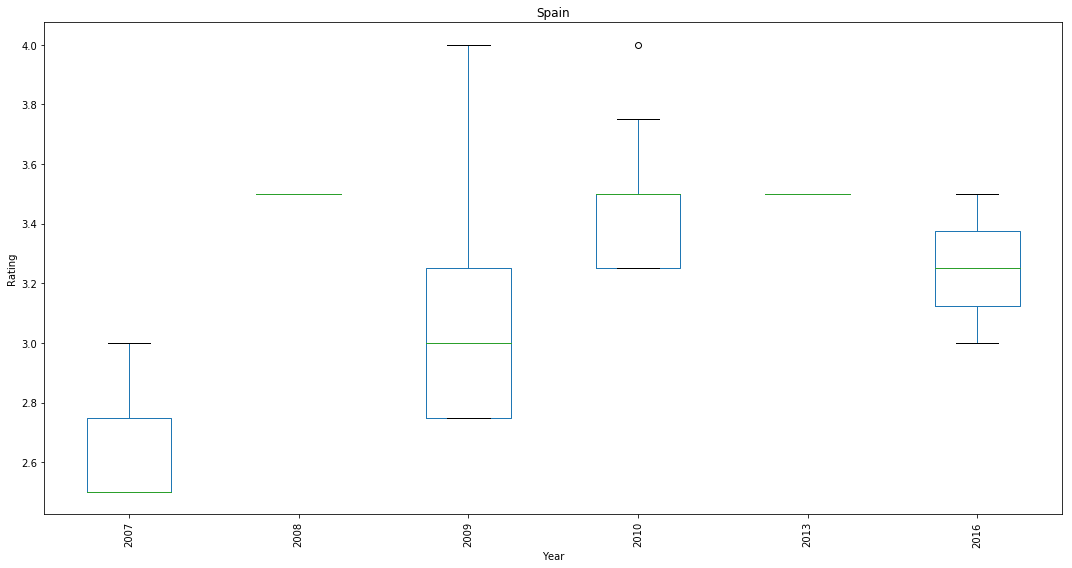

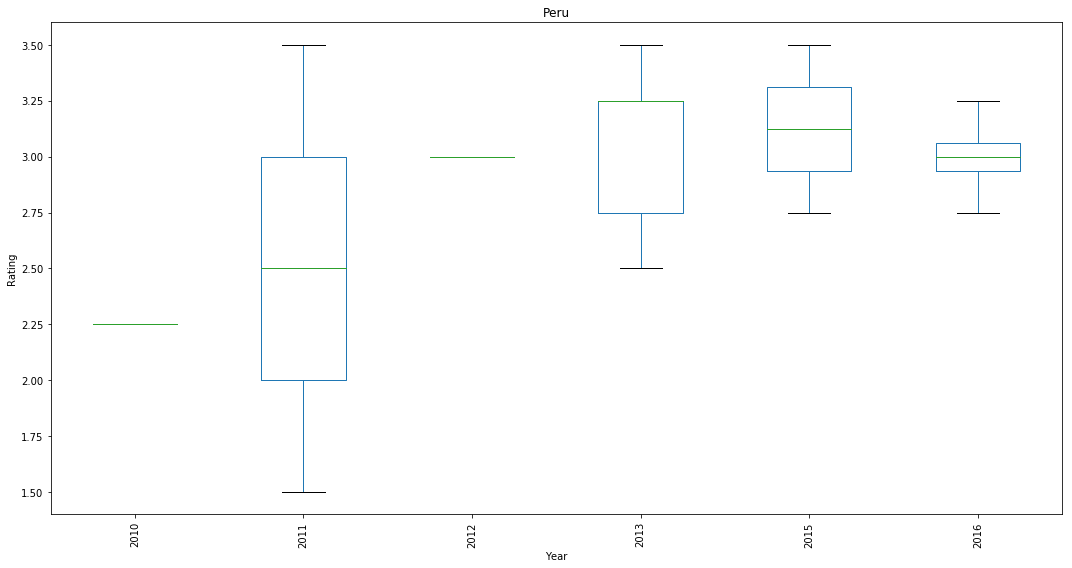

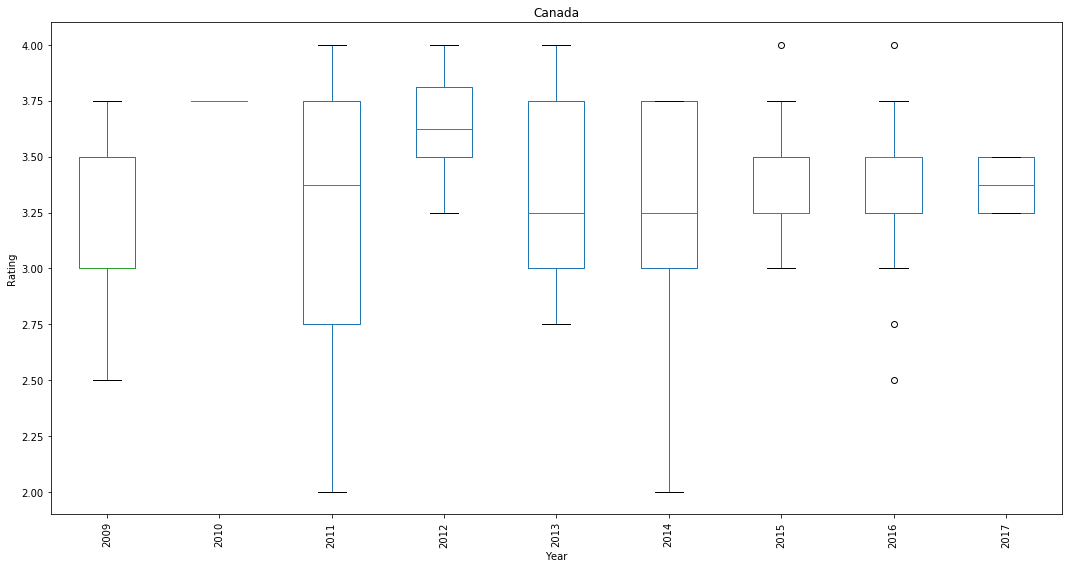

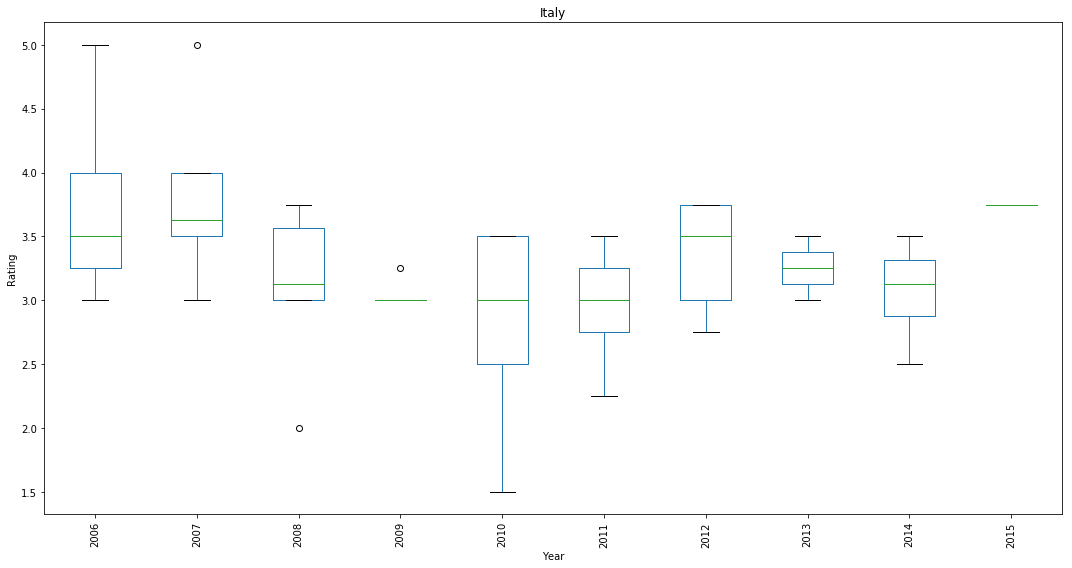

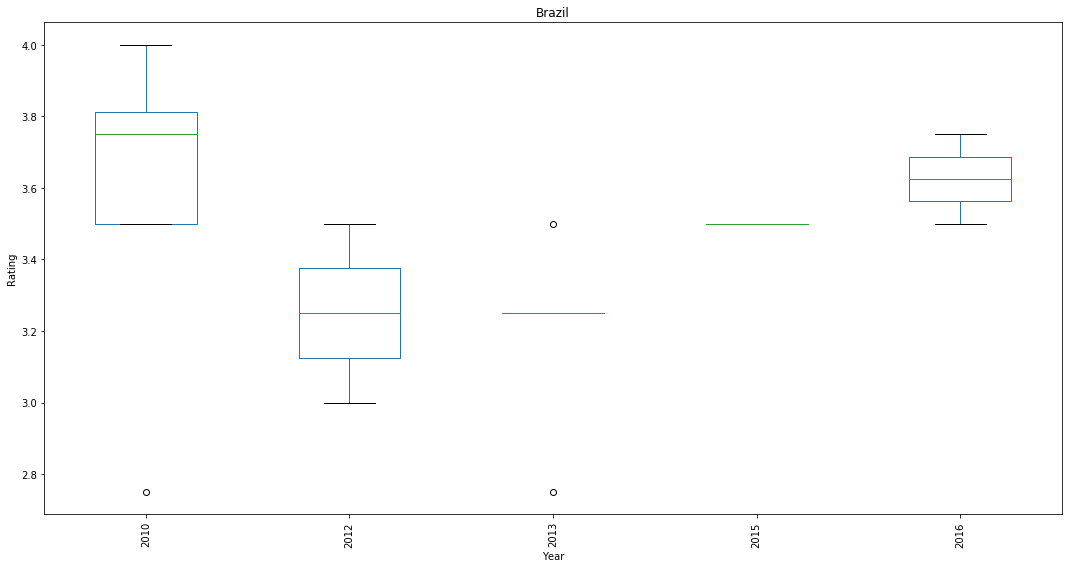

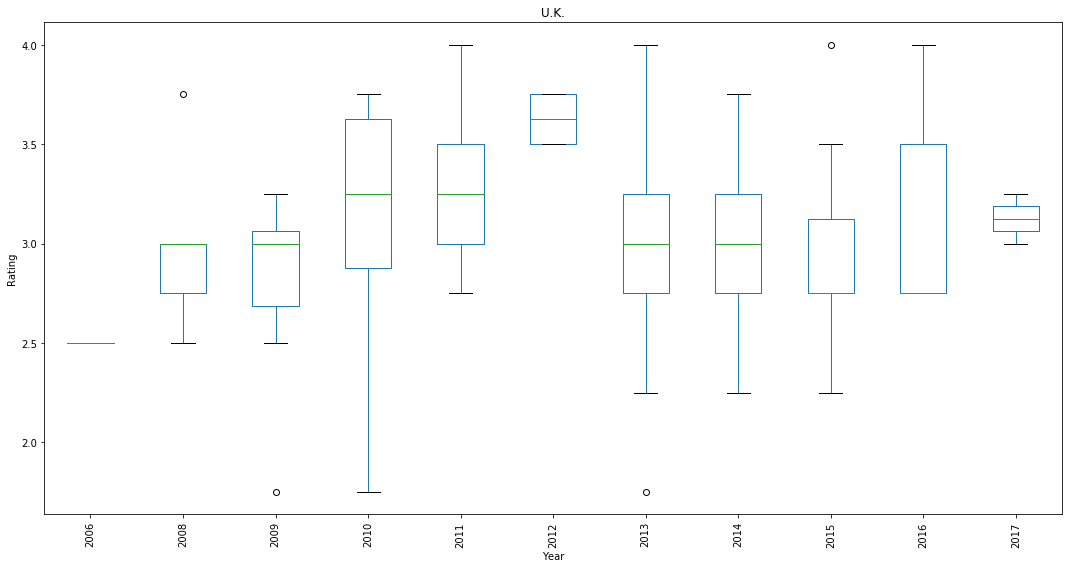

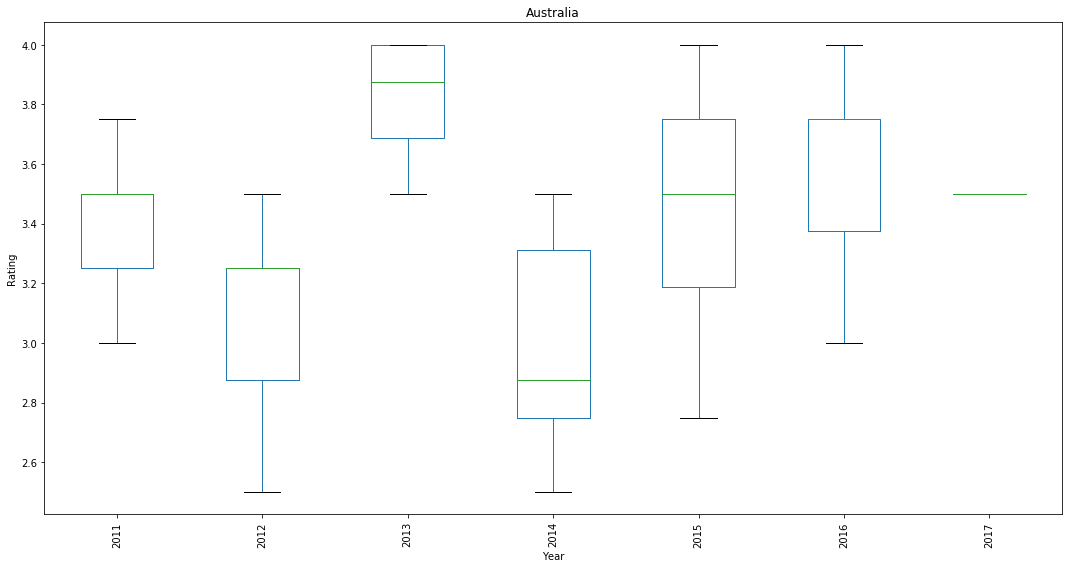

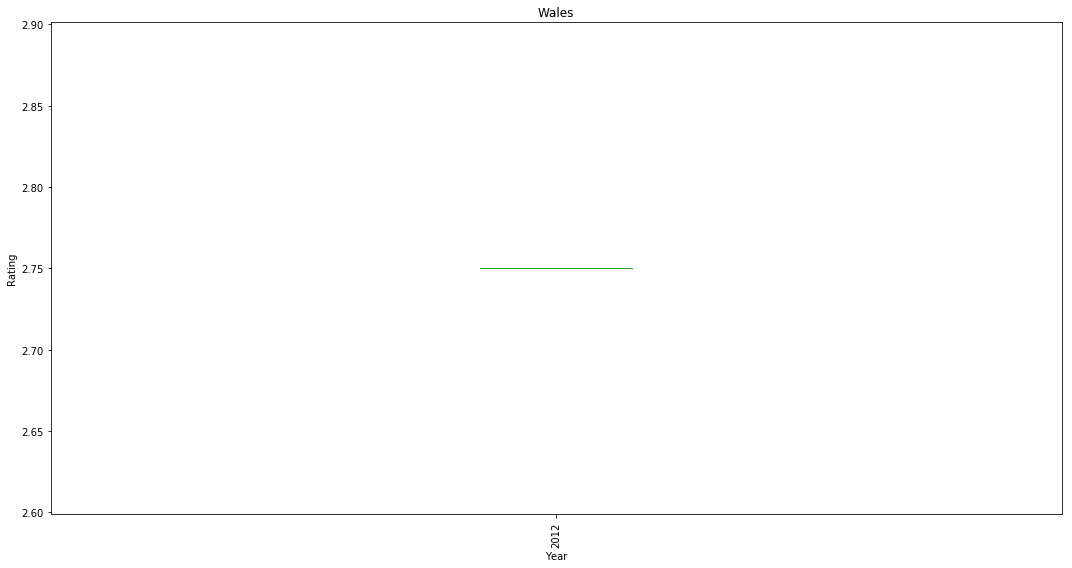

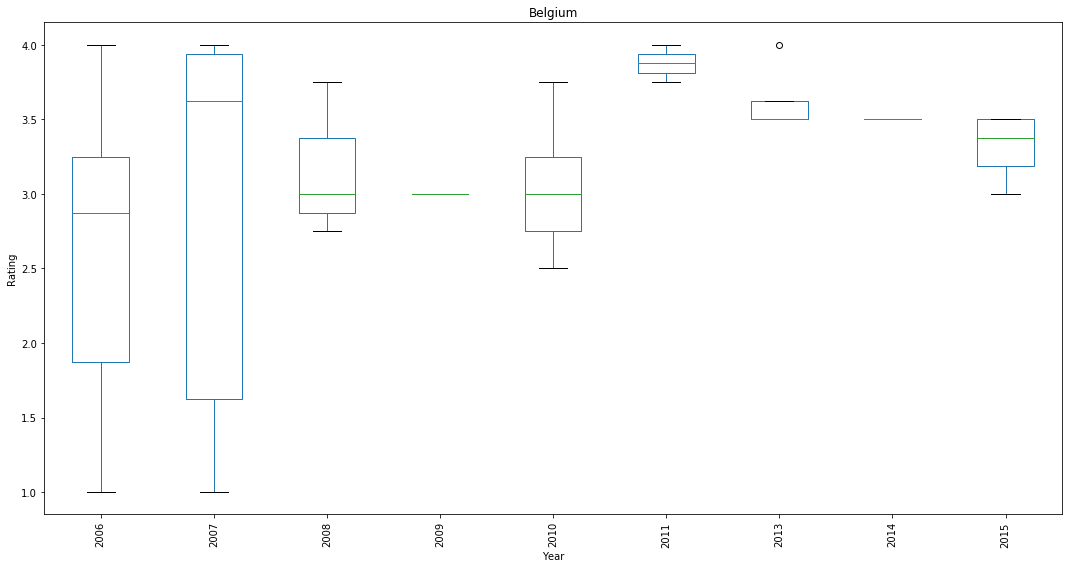

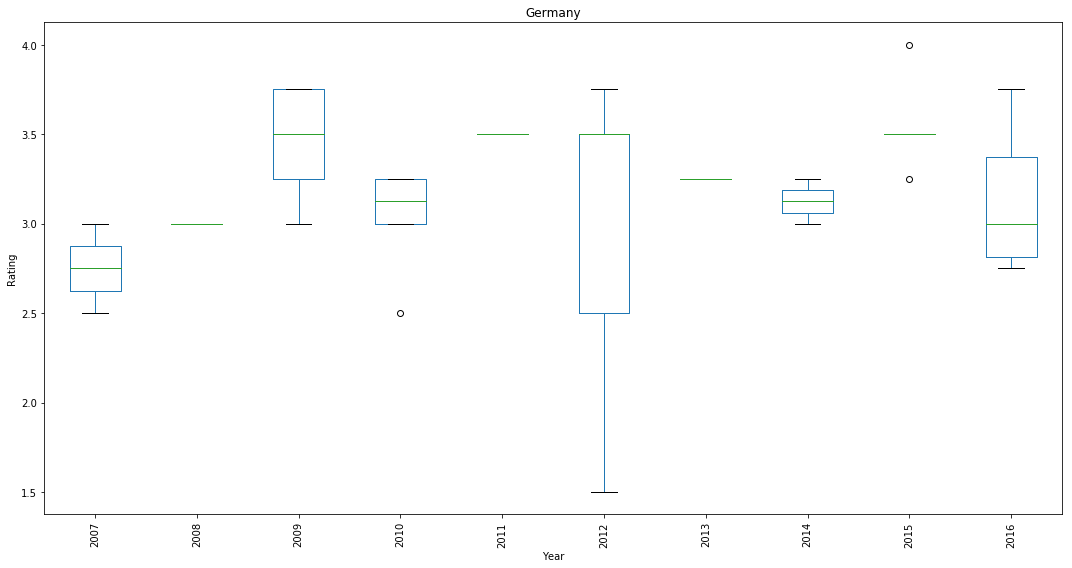

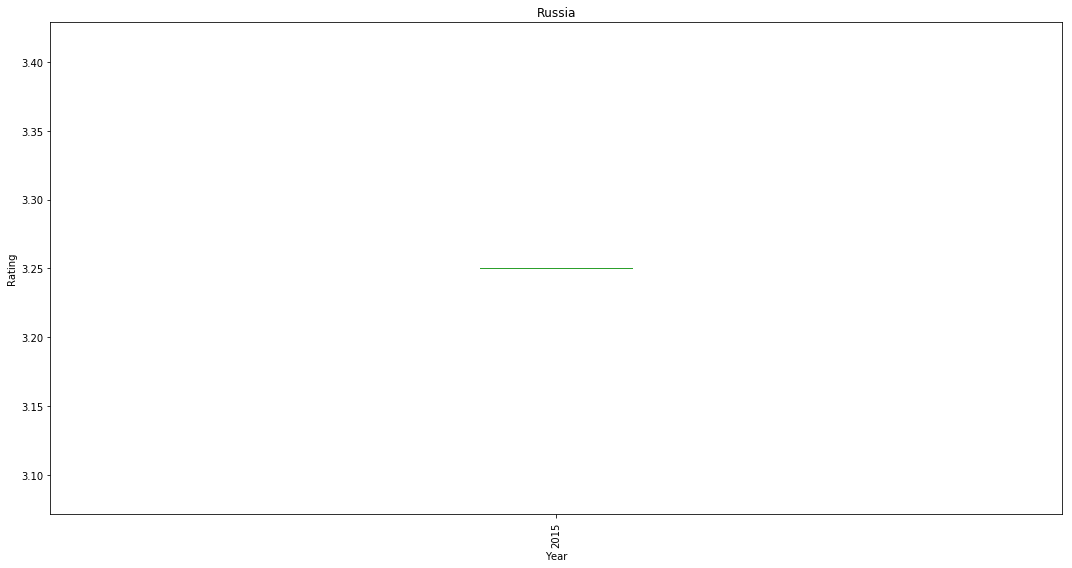

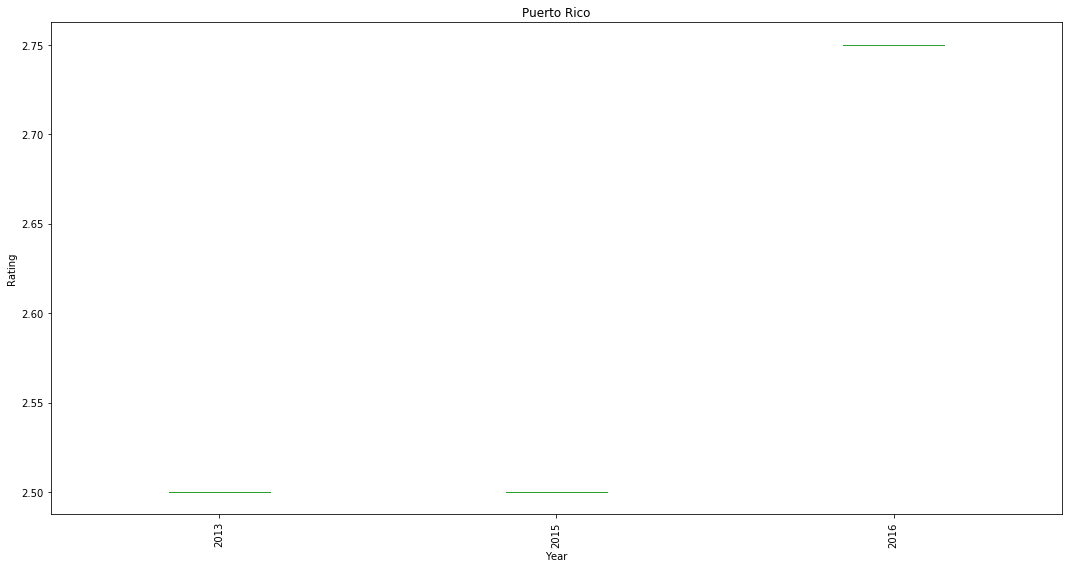

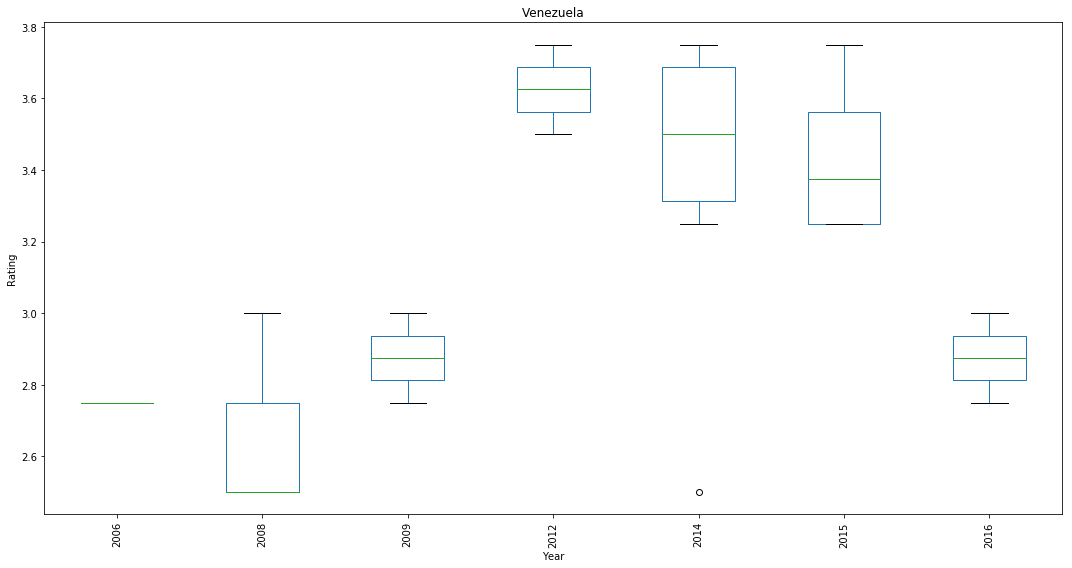

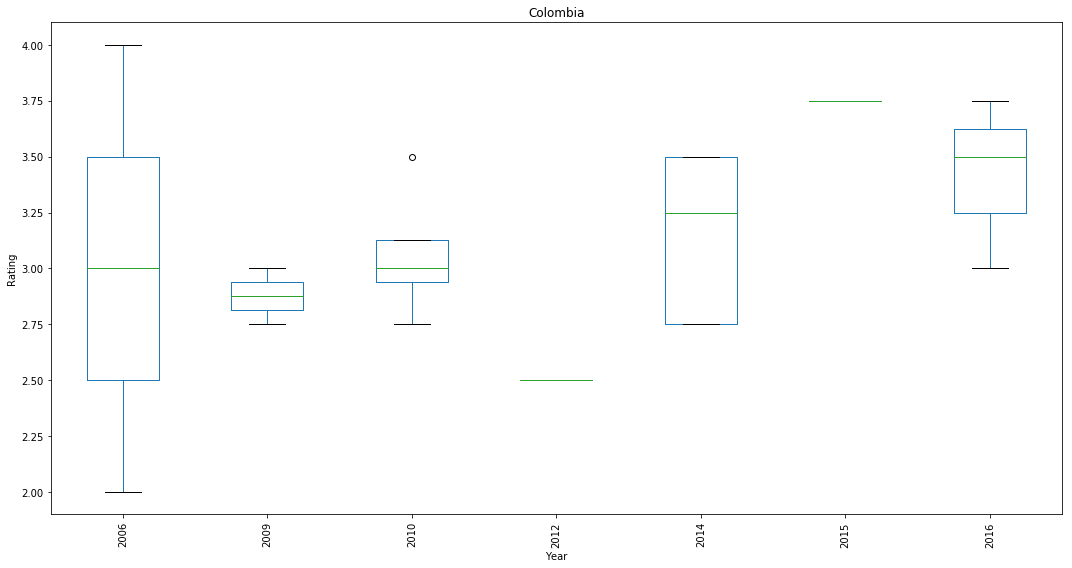

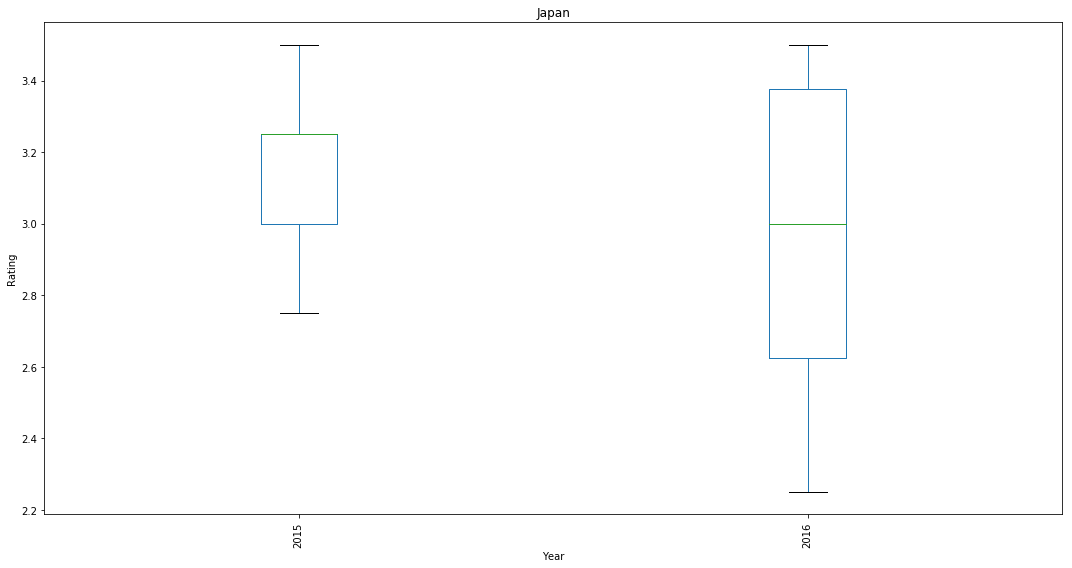

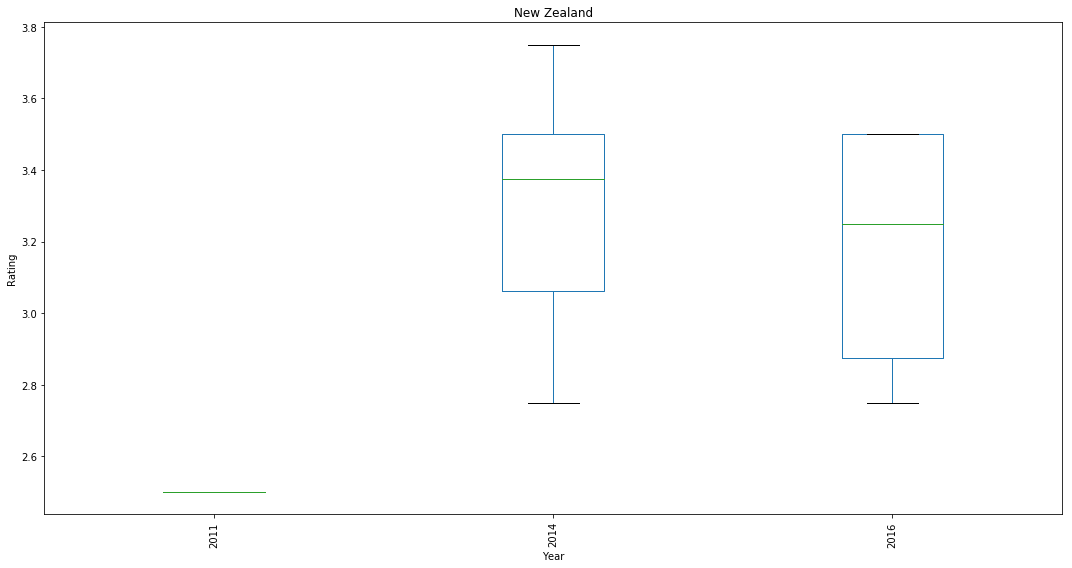

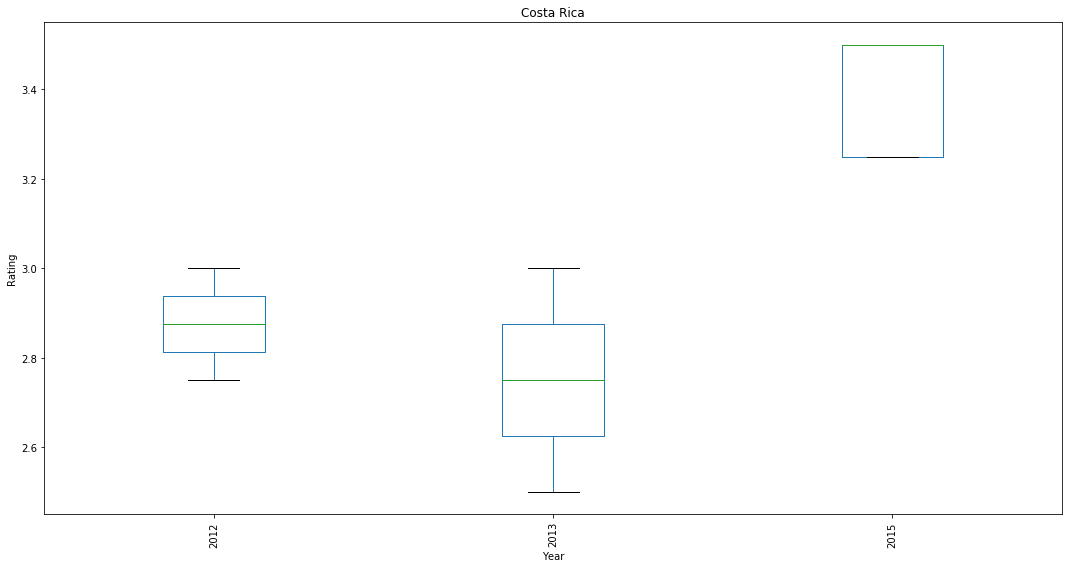

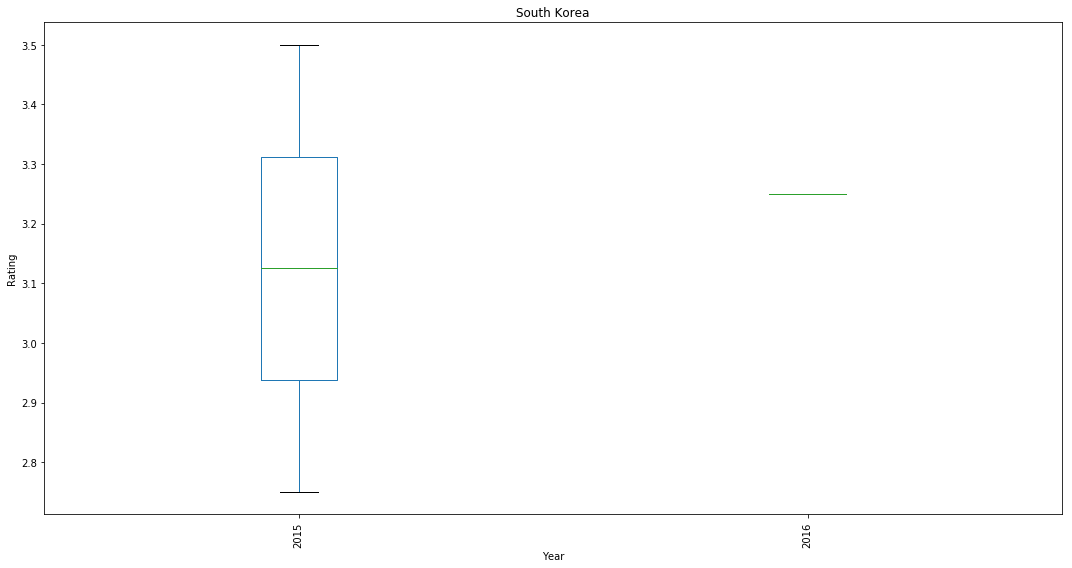

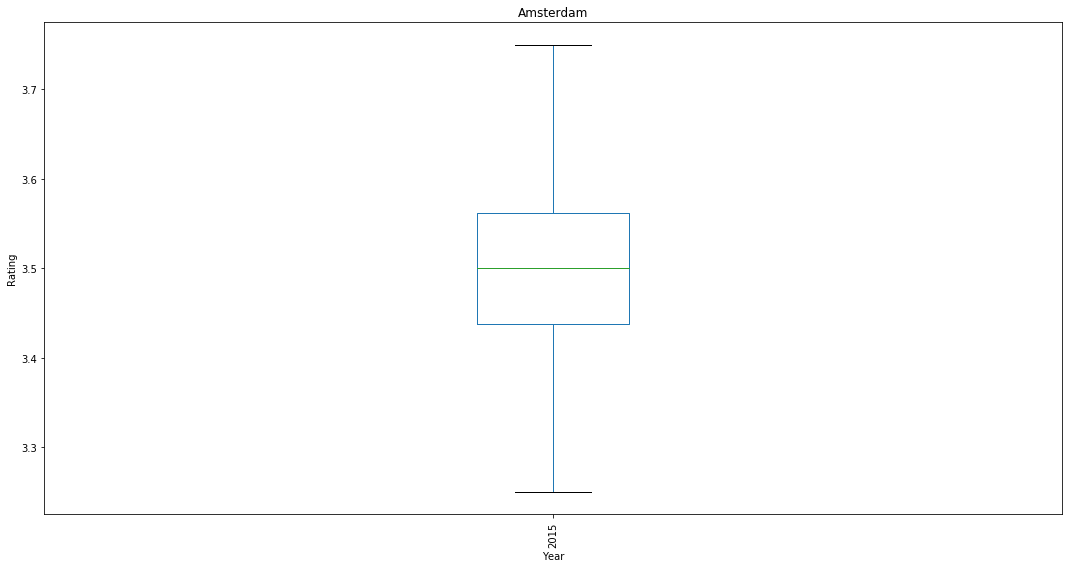

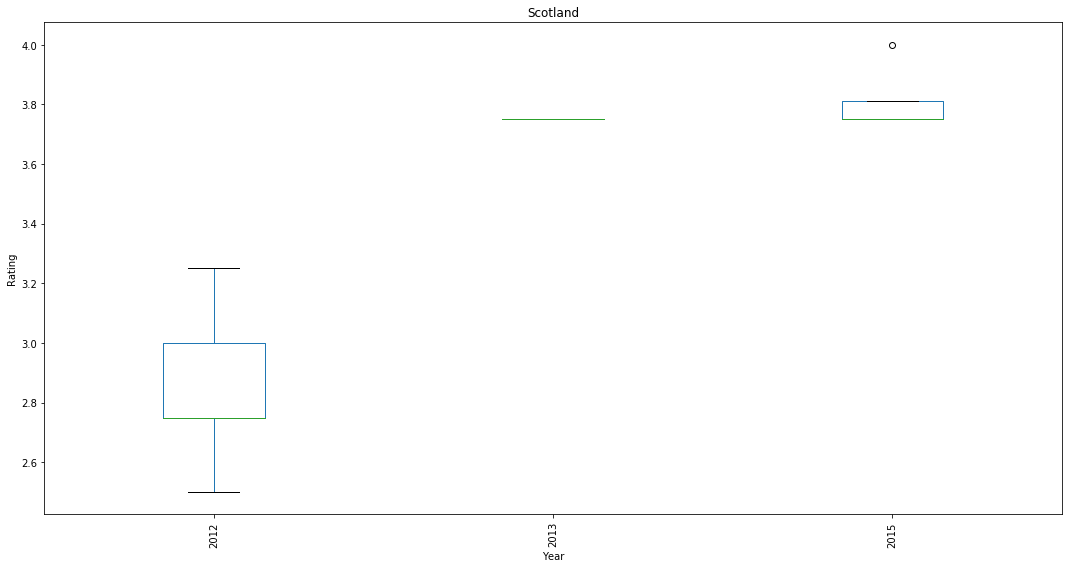

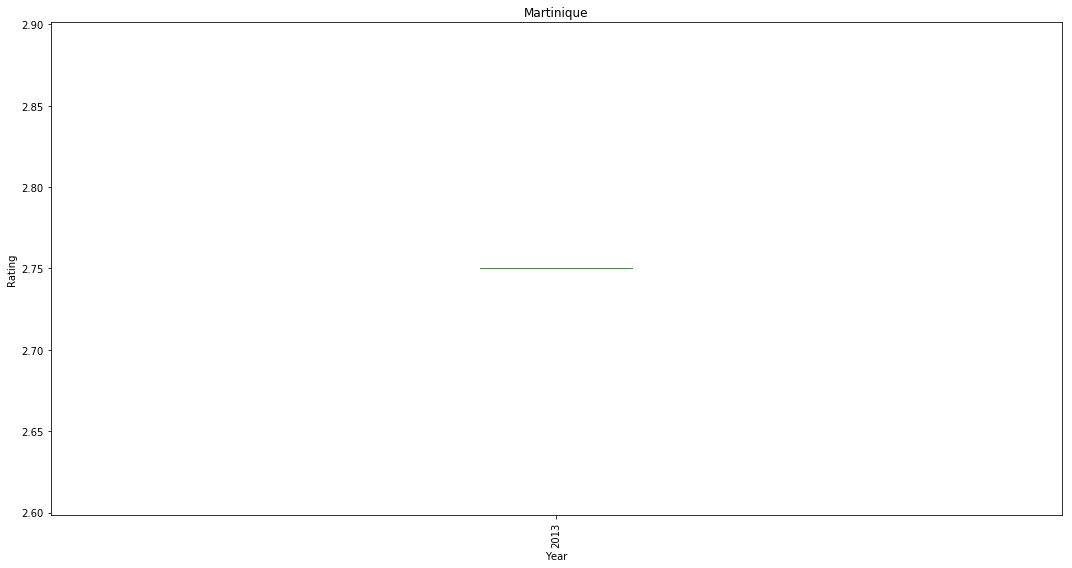

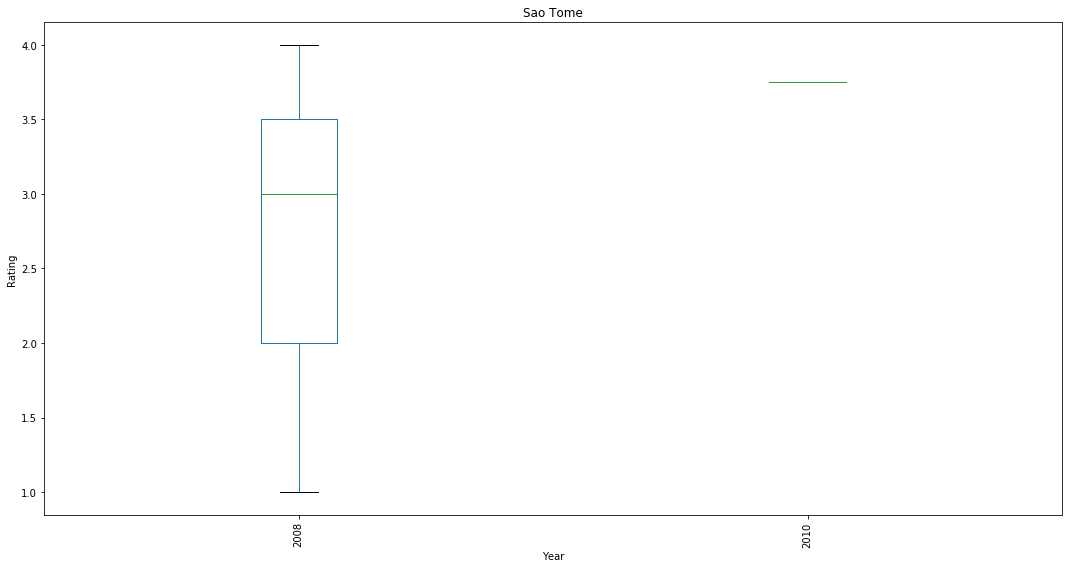

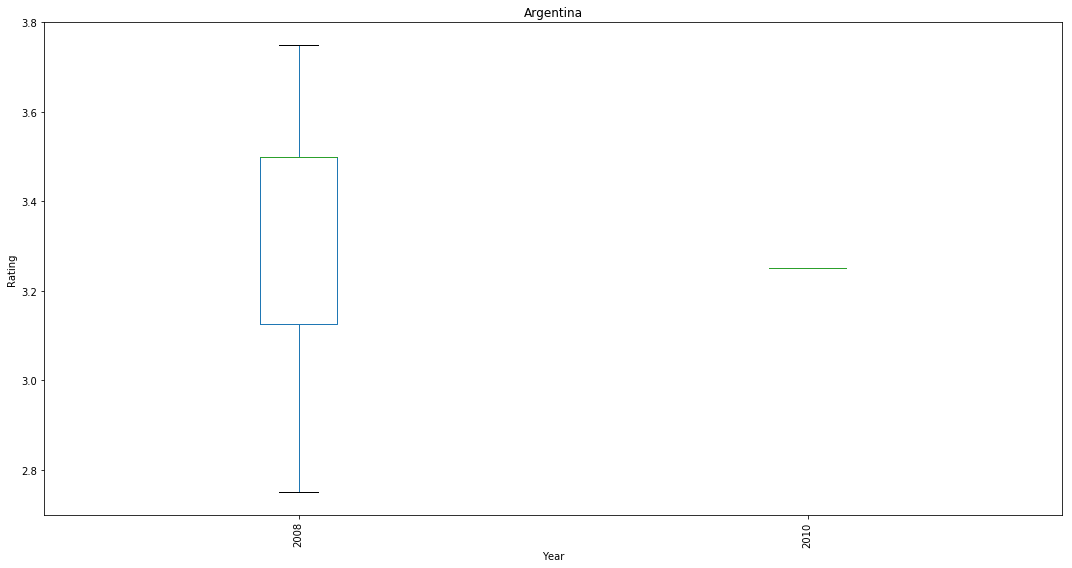

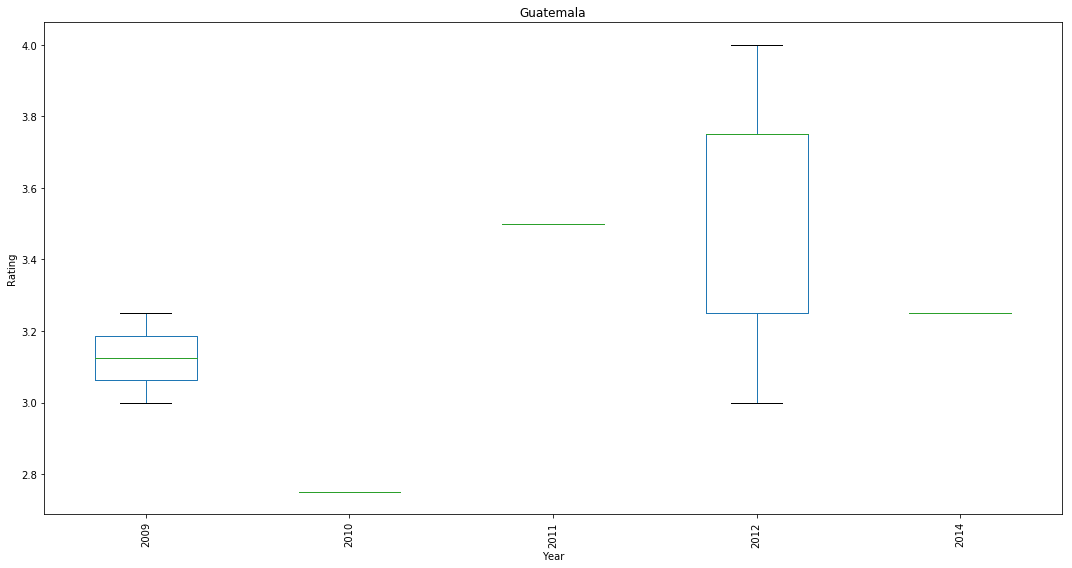

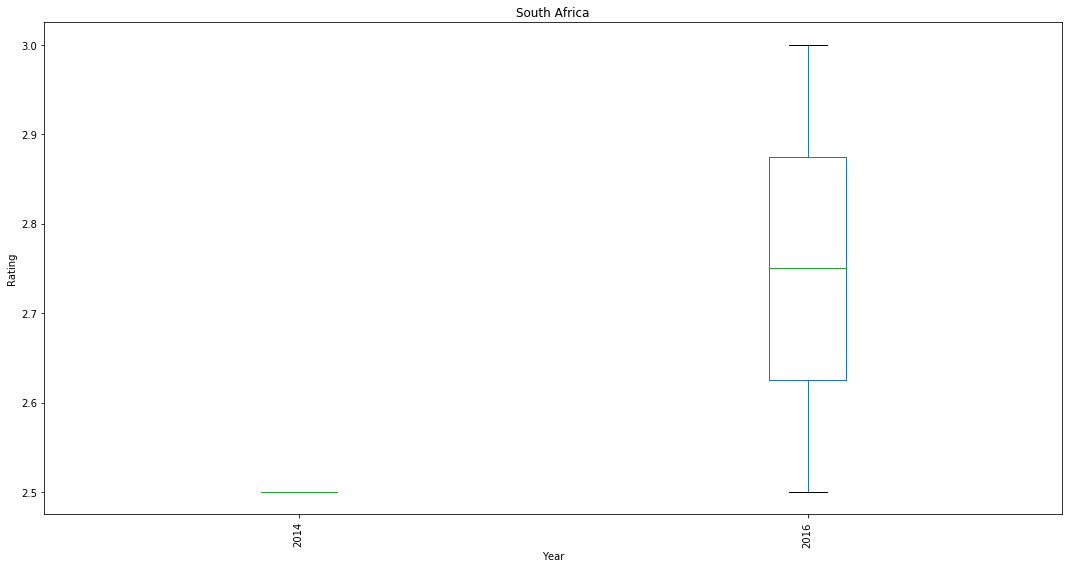

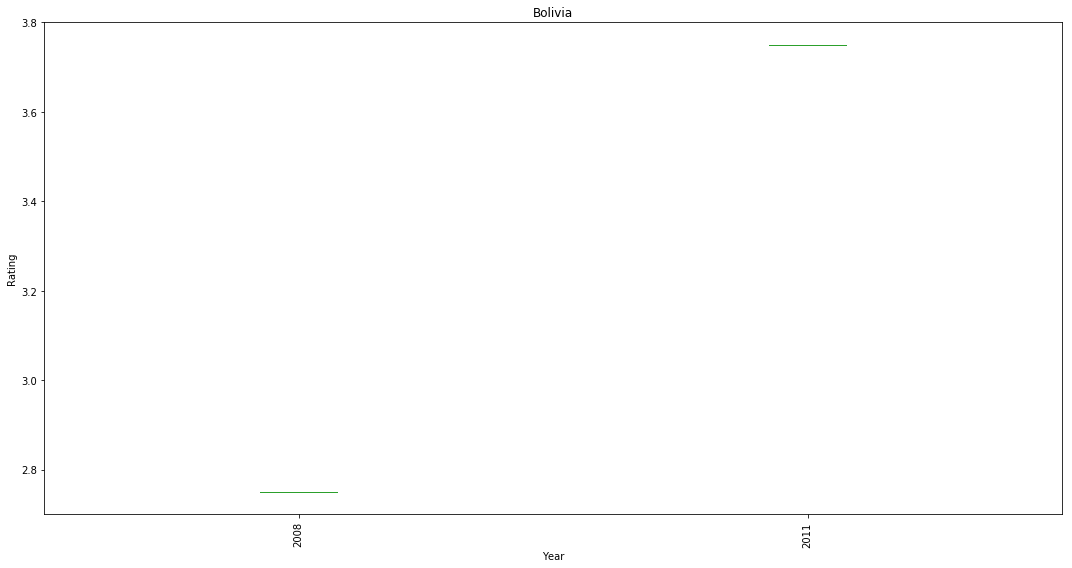

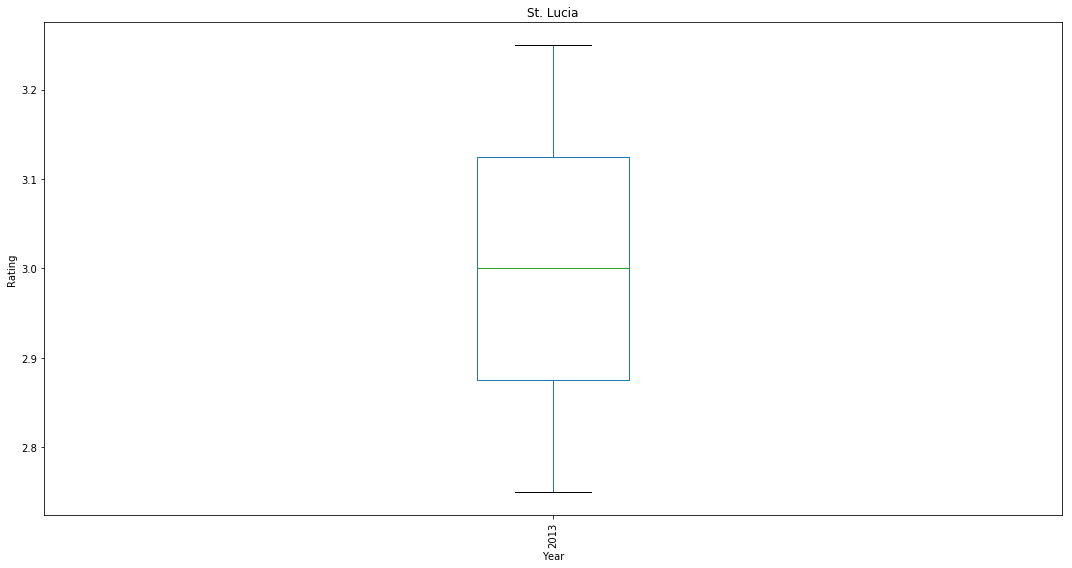

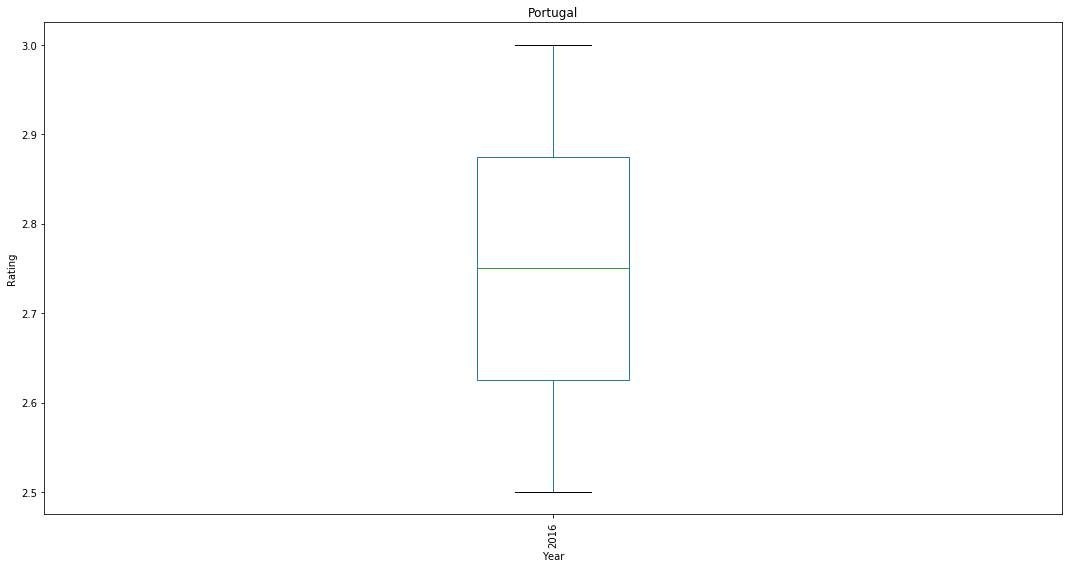

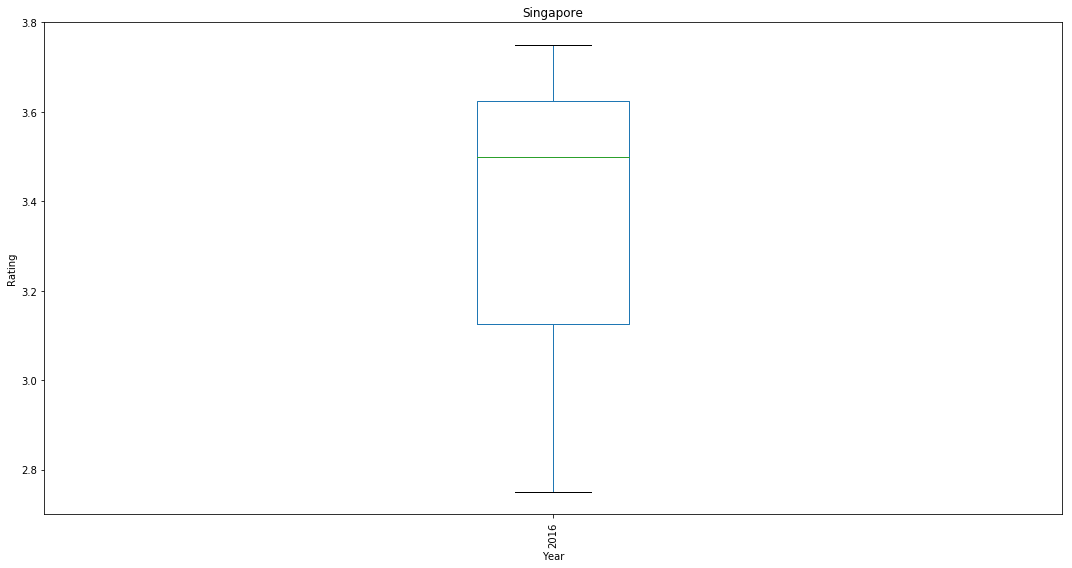

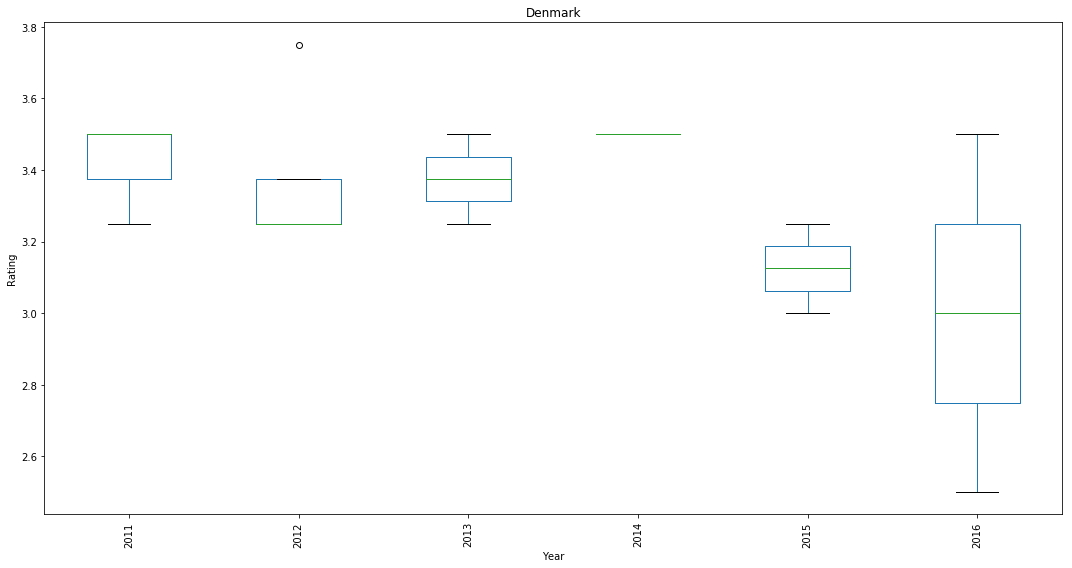

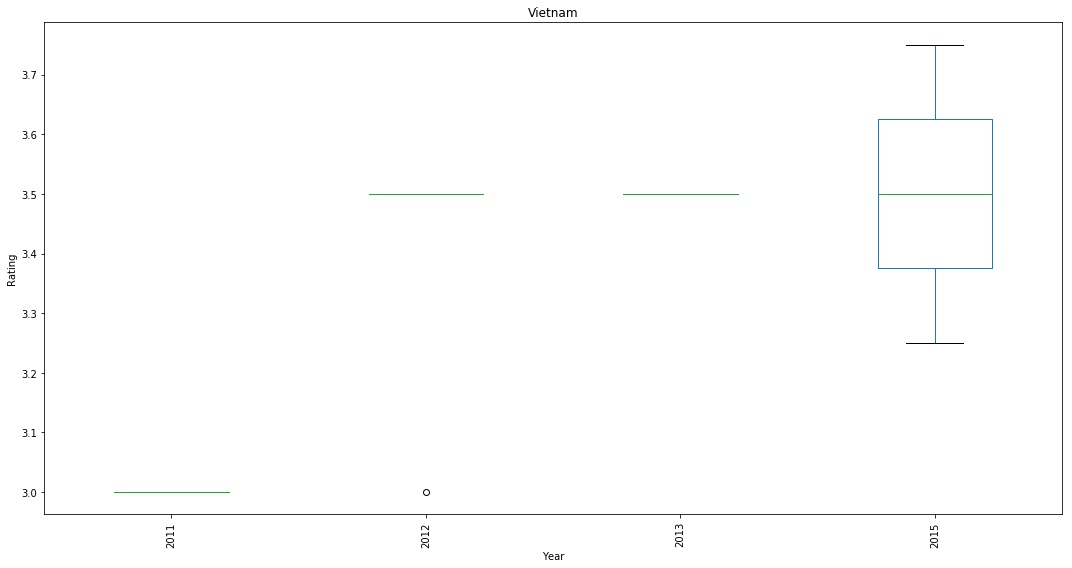

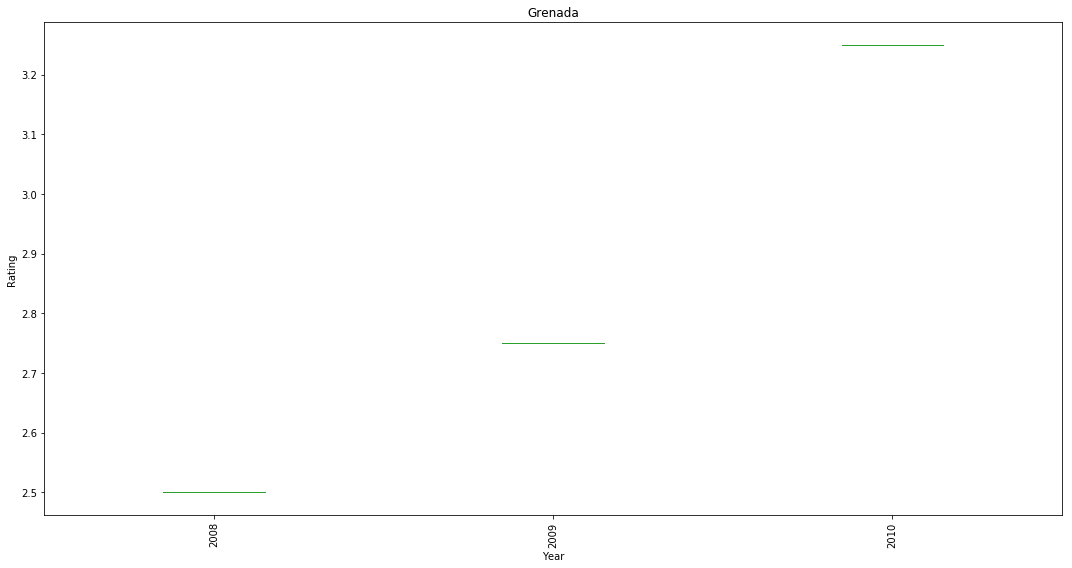

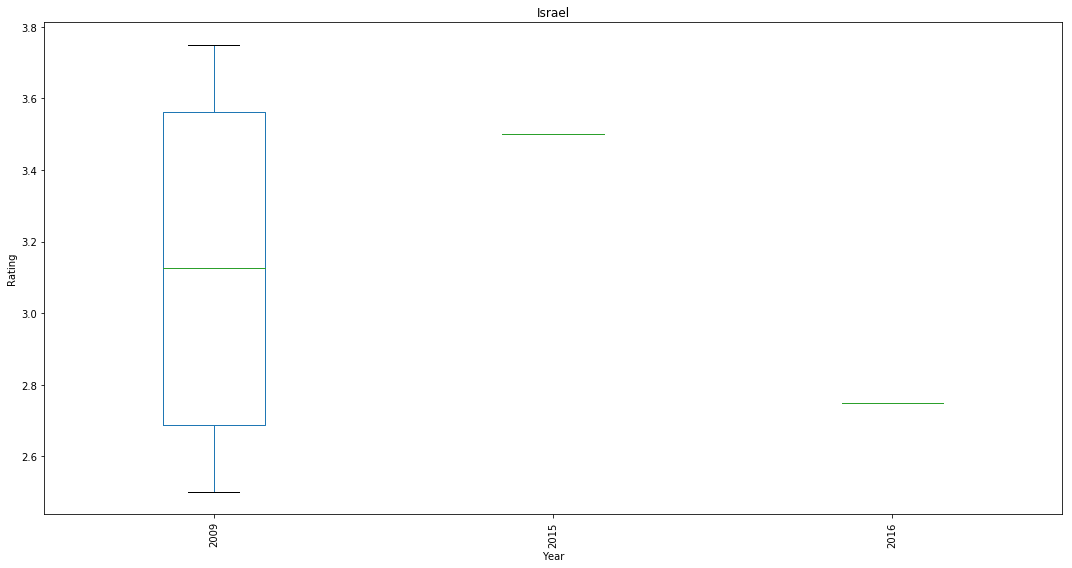

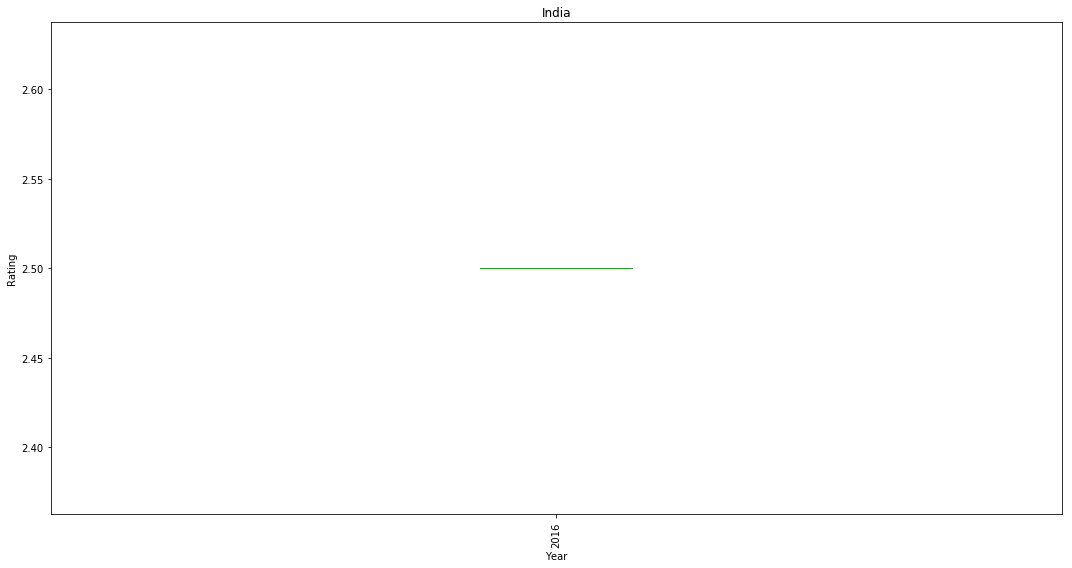

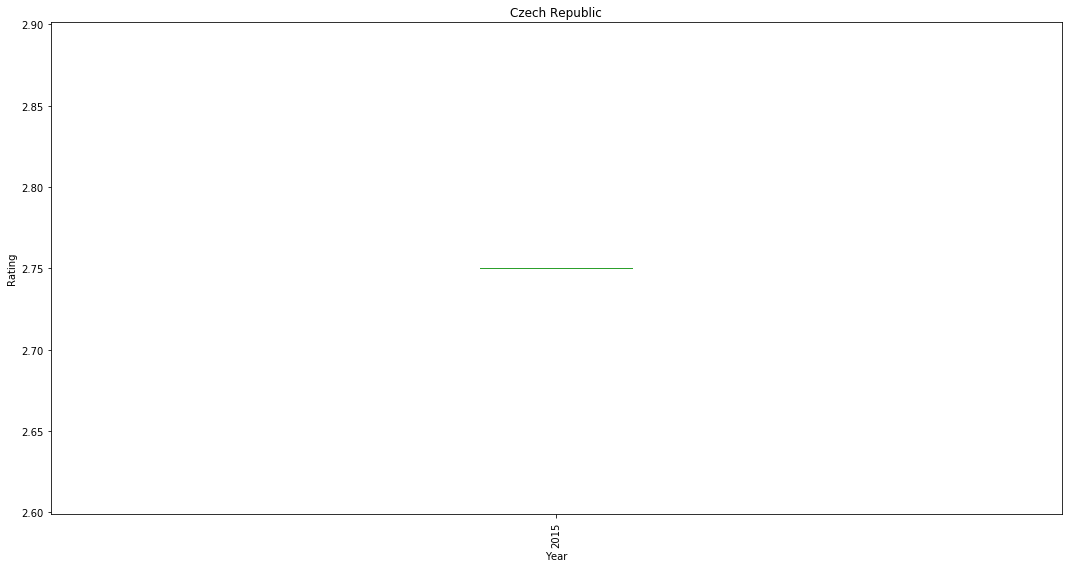

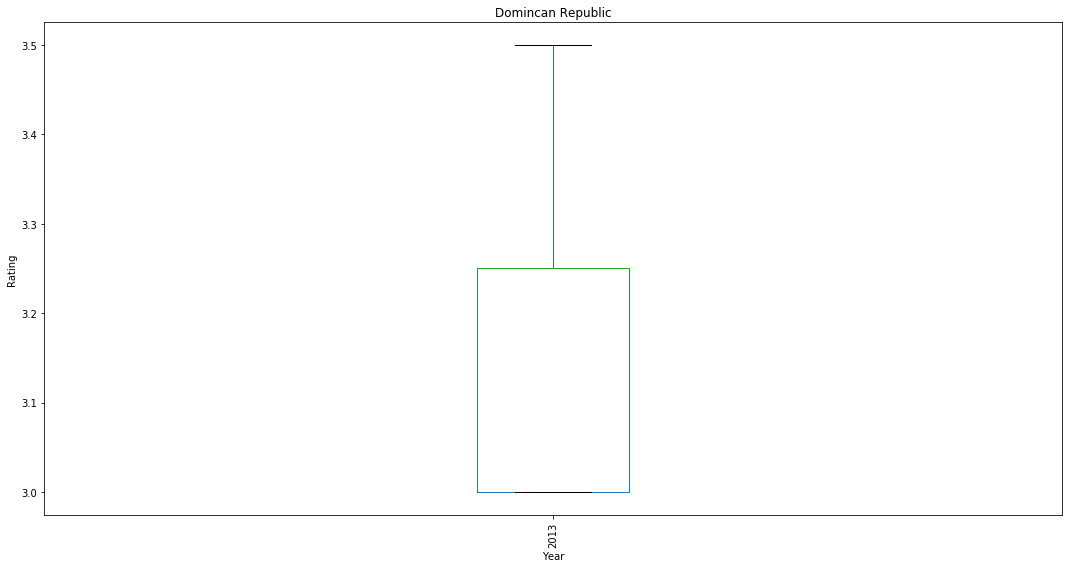

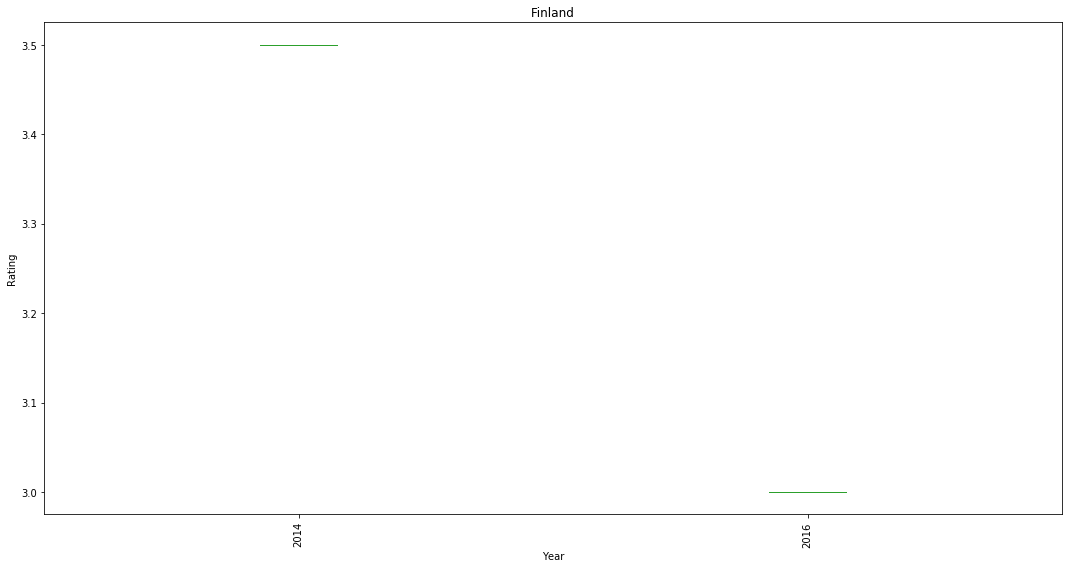

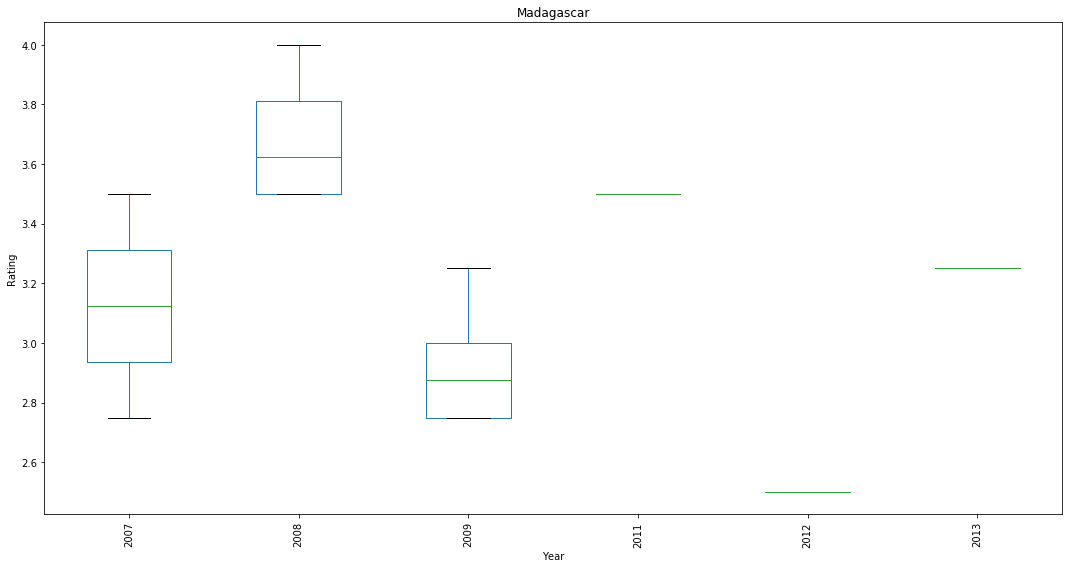

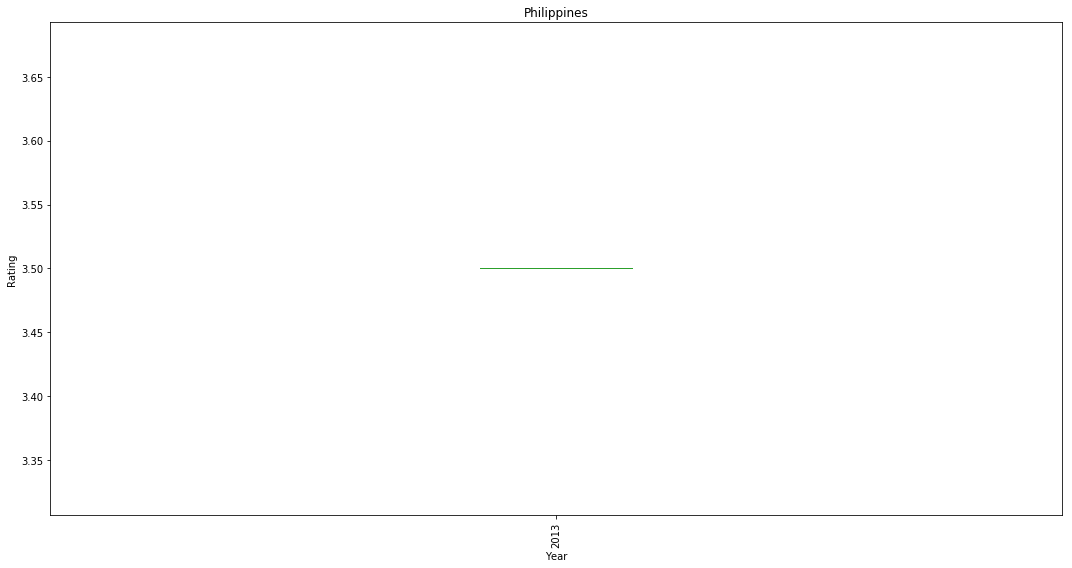

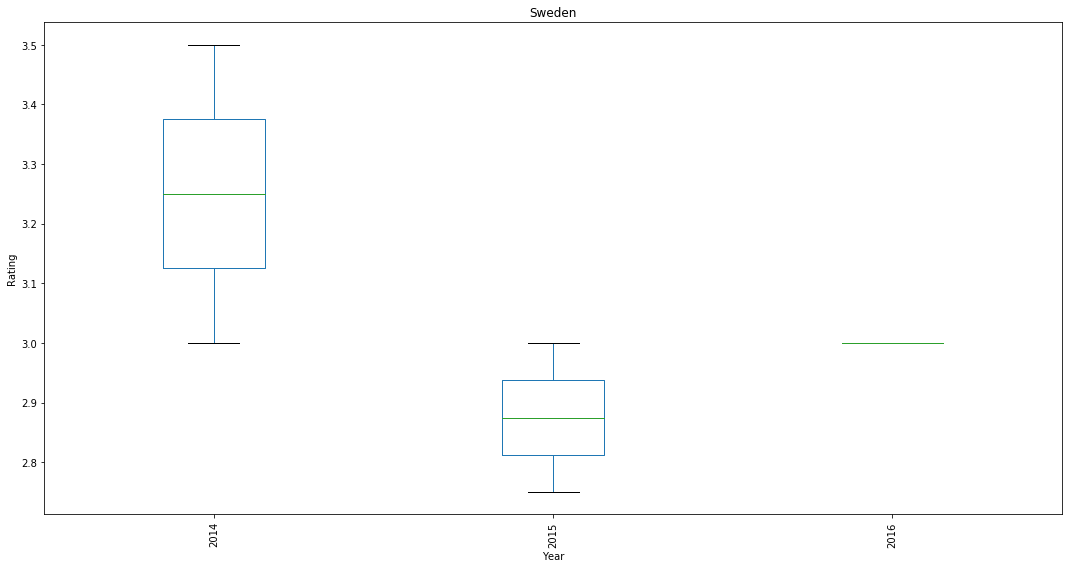

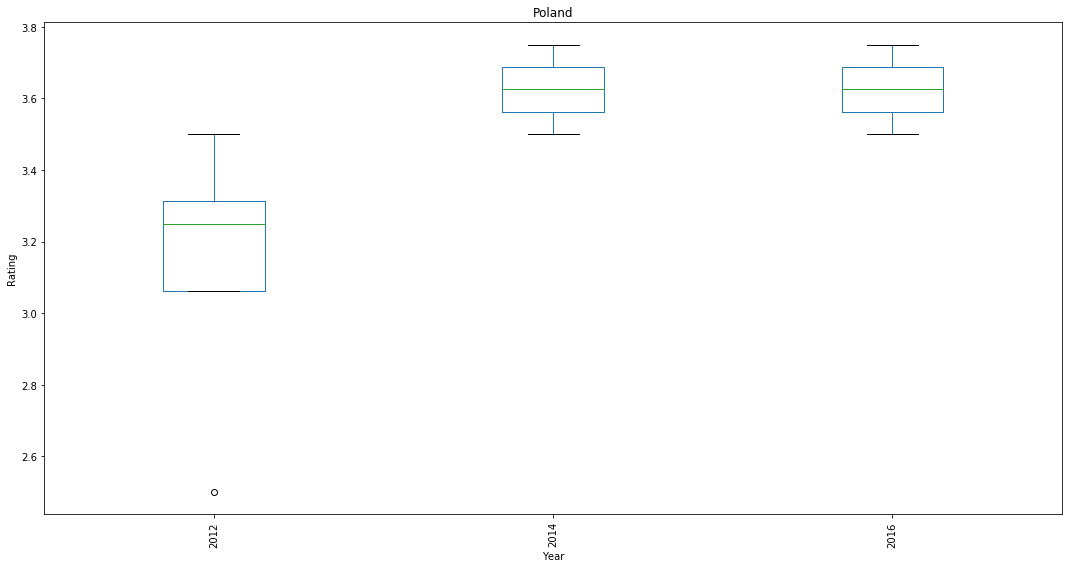

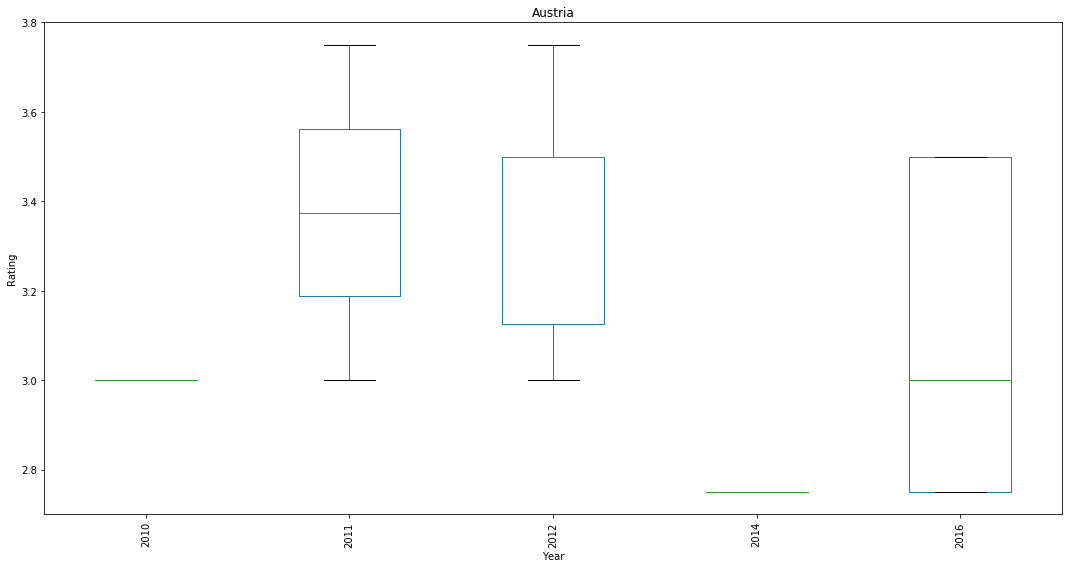

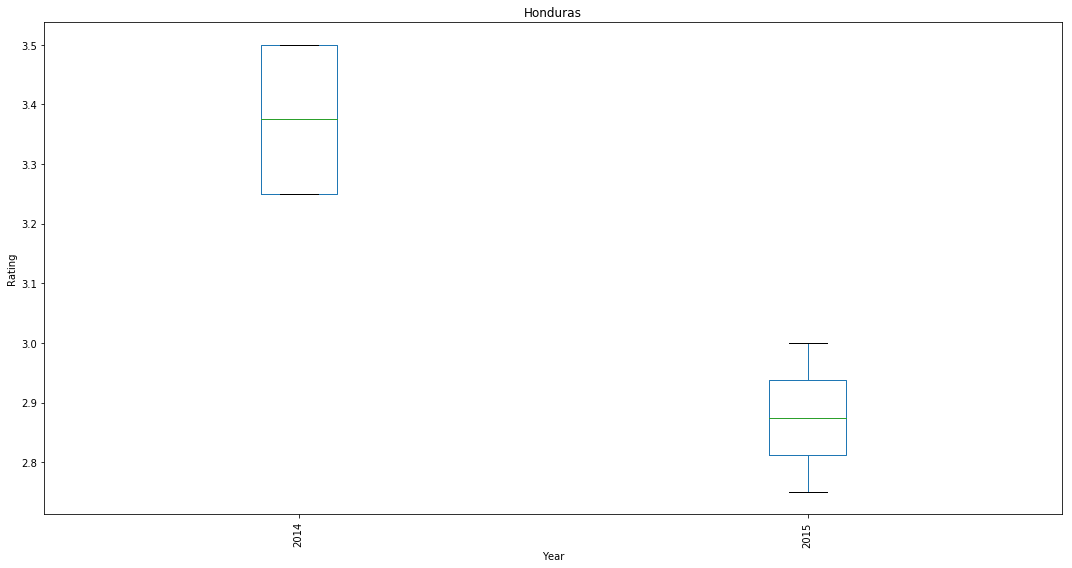

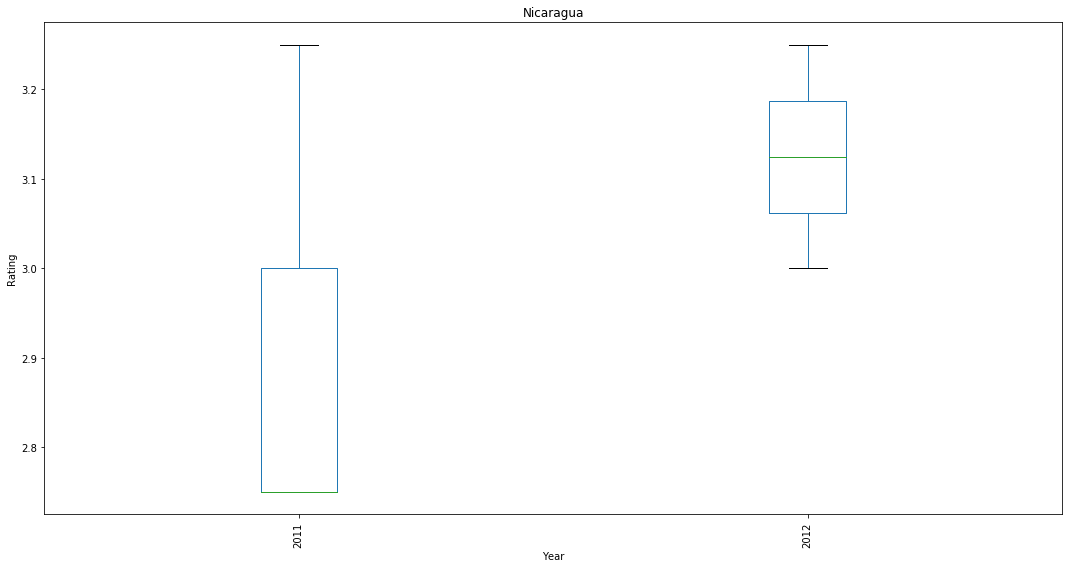

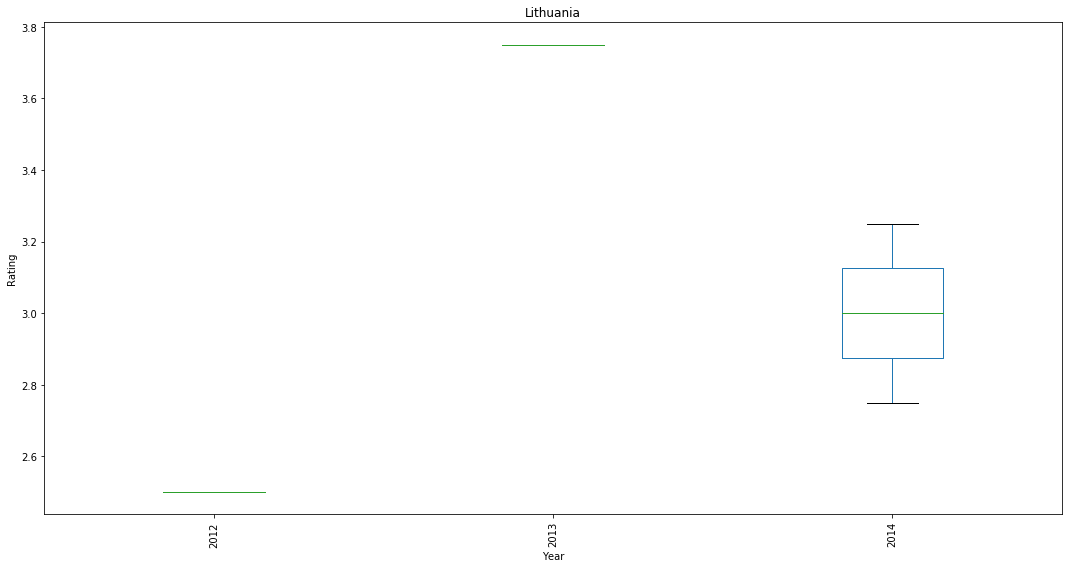

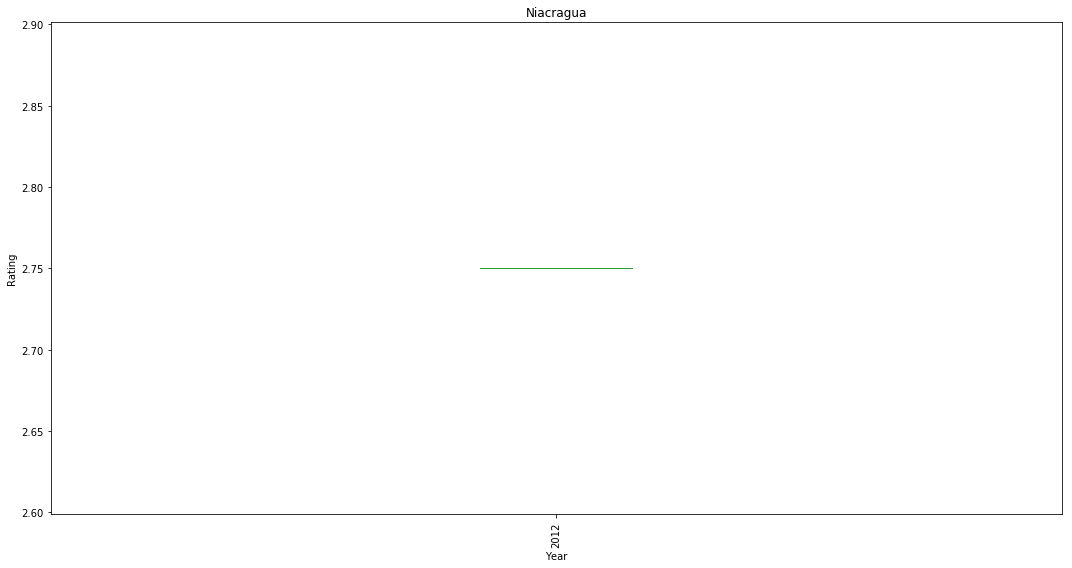

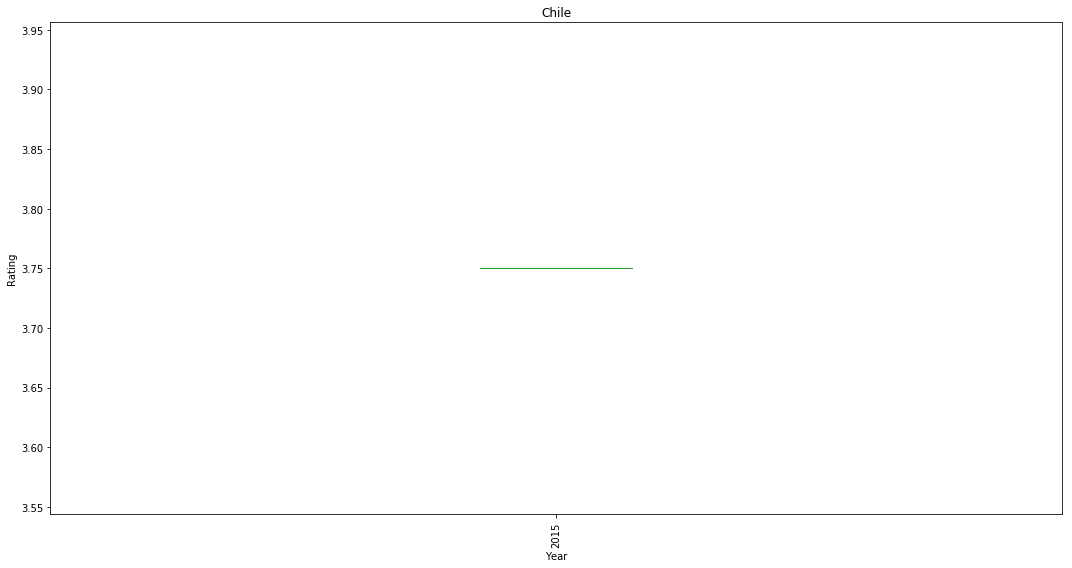

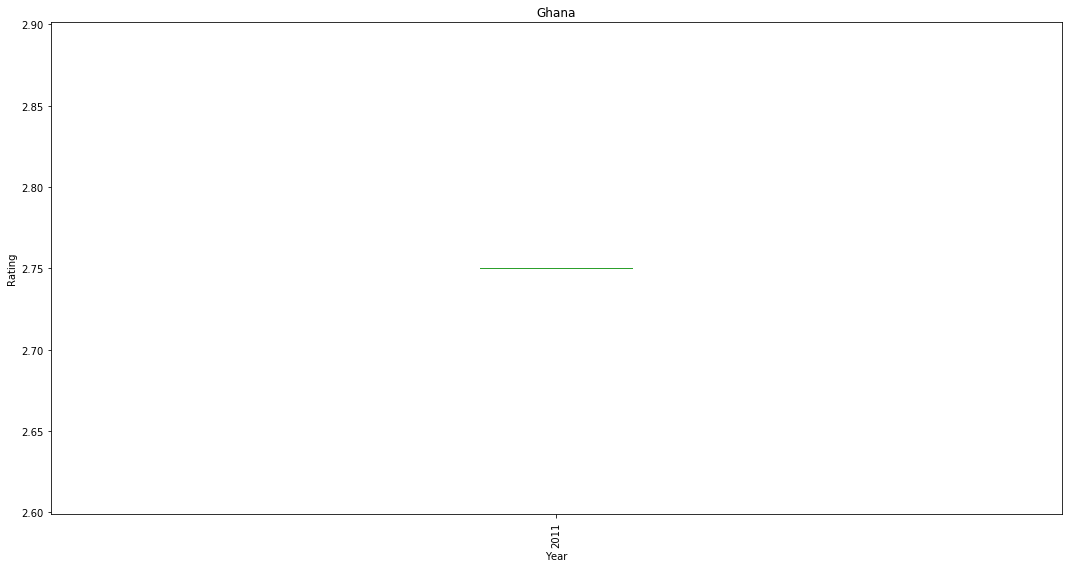

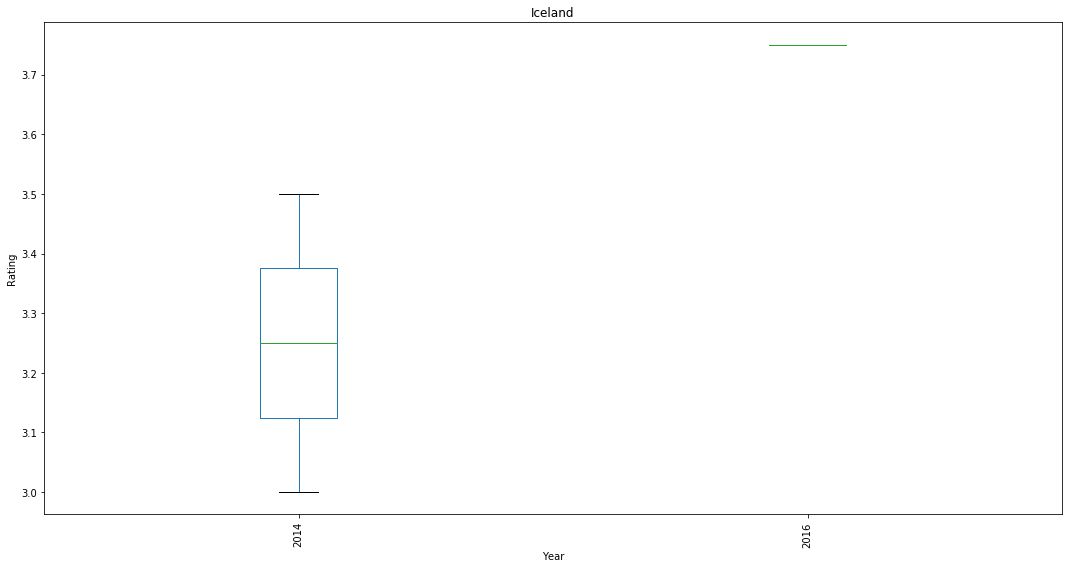

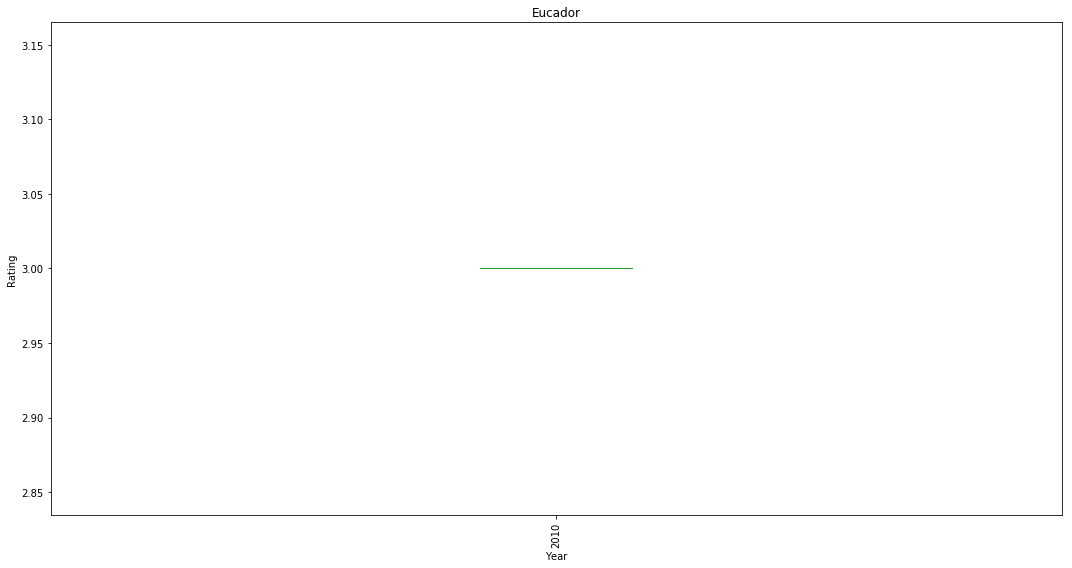

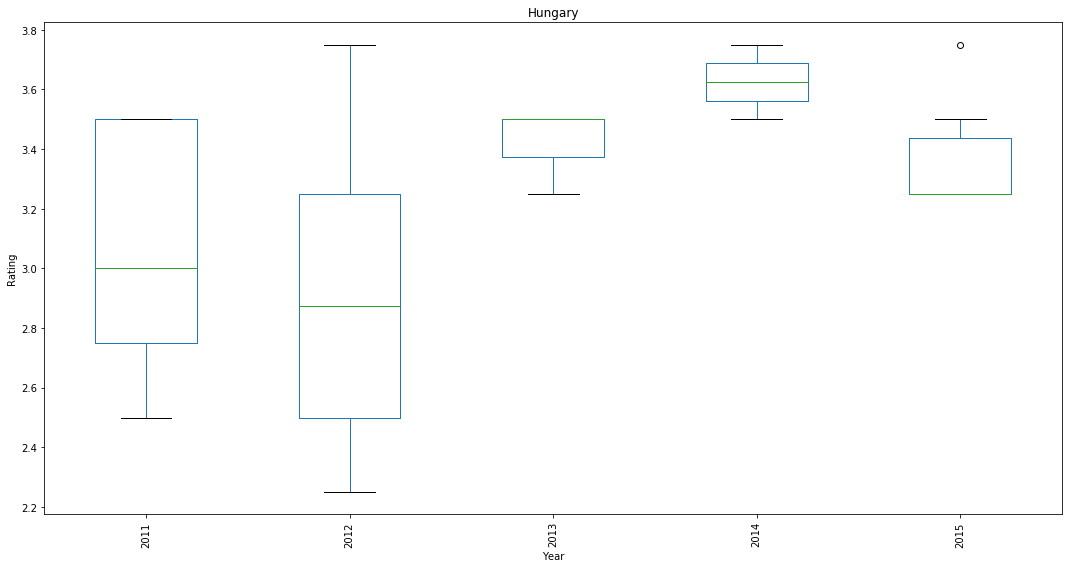

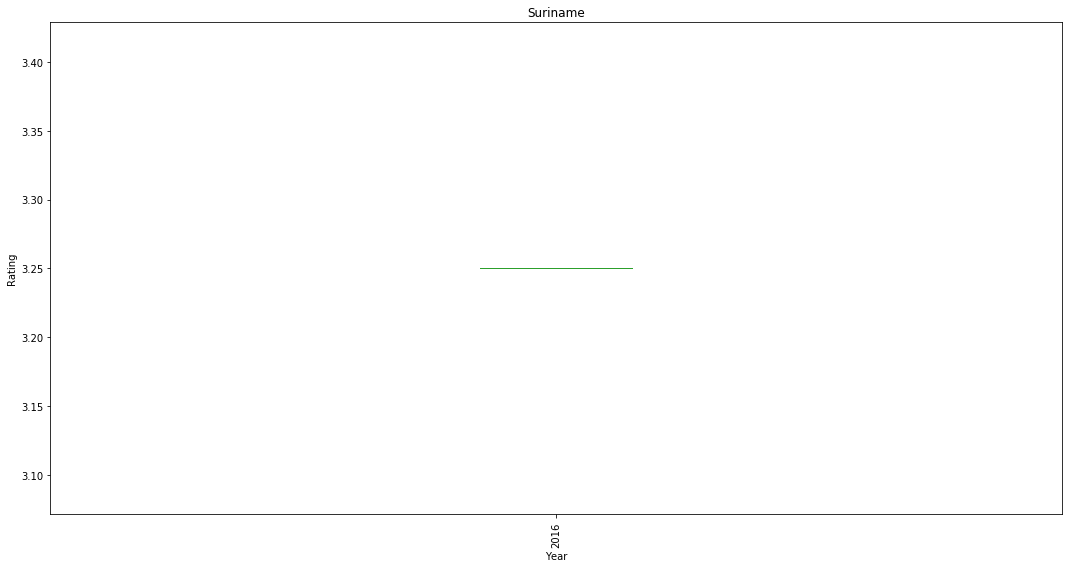

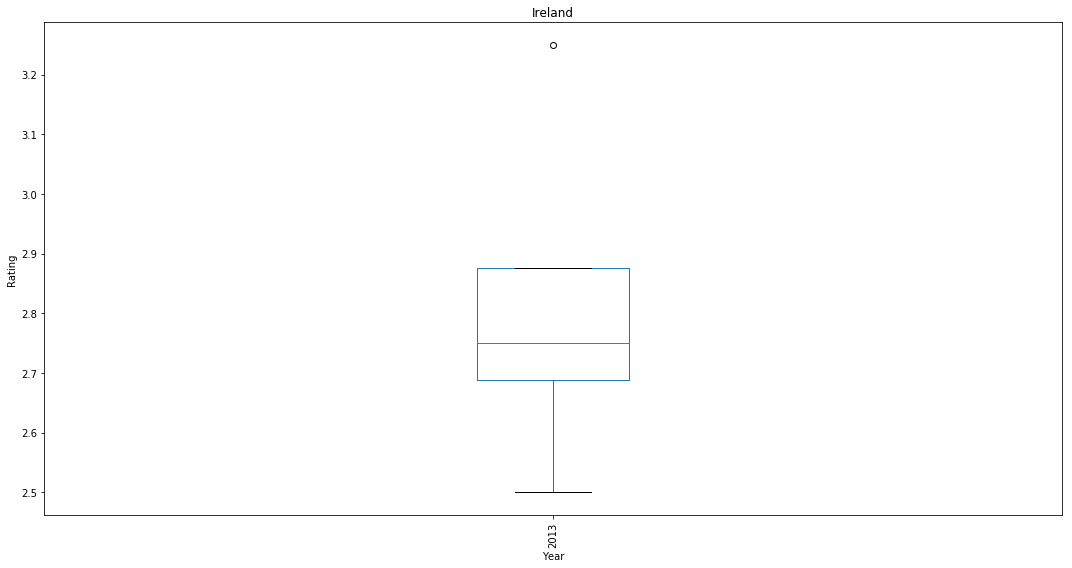

In [16]:
# Plot of rating per year by country

for i in range(len(dfx)):
    dfx[i].boxplot(by = "Review\nDate",
                   column = "Rating",
                   grid = False, rot = 90, figsize = (15,8))

    plt.suptitle("")
    plt.title(comp_ls[i])
    plt.xlabel("Year")
    plt.ylabel("Rating")
    plt.tight_layout()